In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 50  # 화면상 출력되는 최대 컬럼수 셋팅
pd.options.display.float_format = '{:.5f}'.format  # 과학적 표기법으로 출력되지 않도록 셋팅
# pd.reset_option('display.float_format')

# EDA 및 전처리 진행(1차)

## movies_metadata.csv : 영화 메타데이터 파일

In [4]:
movies_metadata = pd.read_csv('./data/movies_metadata.csv')
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.94694,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70000,5415.00000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.01554,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90000,2413.00000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71290,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50000,92.00000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10000,34.00000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70000,173.00000


In [5]:
movies_metadata.columns  # 컬럼 리스트 확인

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies_metadata.dtypes  # 데이터타입 확인 => 4개 컬럼을 제외하고 모두 object 형태임

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
movies_metadata.isnull().sum()  # null값들이 존재하는 컬럼 다수 존재

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### 컬럼 구성

#### adult
* Fasle가 대다수이며, True 9건 존재함. 의미가 불분명한 데이터도 존재 => False인 데이터만 추출

In [8]:
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [9]:
# False 또는 True가 아닌 데이터 확인 => 데이터 자체가 잘못 입력된 것으로 보임. 제외 필요
movies_metadata.query('adult != "False" and adult != "True"')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# "adult"컬럼 값이 False인 값만 추출
movies_metadata_v1 = movies_metadata[movies_metadata['adult'] == "False"]

#### belongs_to_collection
* 포스터이미지 등 해당 영화 정보 컬럼 => 학습 데이터에는 제외해도 될 것으로 판단

In [11]:
movies_metadata_v1['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

#### budget
* 0 ~ 380,000,000까지 분포하며, 데이터가 한쪽으로 쏠려있음 확인됨 => 추후 학습 진행 시 조치 필요

In [12]:
movies_metadata_v1['budget'] = movies_metadata_v1.loc[:,'budget'].astype(float)  # float 형변환

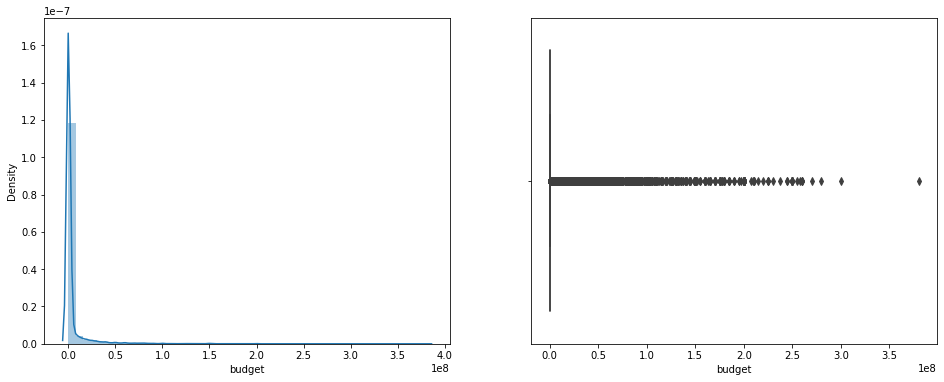

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['budget'], ax=ax[0])
sns.boxplot(movies_metadata_v1['budget'], ax=ax[1])
plt.show()

> 데이터가 한쪽으로 쏠려있음 확인

In [14]:
movies_metadata_v1['budget'].describe()

count       45454.00000
mean      4225398.78992
std      17425759.82592
min             0.00000
25%             0.00000
50%             0.00000
75%             0.00000
max     380000000.00000
Name: budget, dtype: float64

#### genres_name
* 장르id 및 장르명이 딕셔너리 문자열 형태로 되어 있음 => 장르id 및 장르명을 추출한 신규 컬럼 각각 추가 생성
* 여러 장르가 복합된 영화에 대한 처리방안 추후 검토 필요

In [15]:
movies_metadata_v1['genres'][0]  # 문자열 형태로 되어 있음 => 변환 필요

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [16]:
import ast

ast.literal_eval(movies_metadata_v1['genres'][0])  # 문자열 evaluate 적용 결과 테스트

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [17]:
# 문자열 evaluate 적용해 장르id 및 장르명을 추출한 'genres_id', 'genres_name' 컬럼 각각 생성
movies_metadata_v1['genres_name'] = movies_metadata_v1['genres'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['genres_name'] = movies_metadata_v1['genres_name'].apply(lambda x: [v.get('name') for v in x])  # 장르명만 추출

movies_metadata_v1['genres_id'] = movies_metadata_v1['genres'].apply(ast.literal_eval)
movies_metadata_v1['genres_id'] = movies_metadata_v1['genres_id'].apply(lambda x: [v.get('id') for v in x])  # 장르id만 추출

In [18]:
movies_metadata_v1[['genres_id', 'genres_name']]  # 생성된 컬럼 확인

,genres_id,genres_name
0,"[16, 35, 10751]","[Animation, Comedy, Family]"
1,"[12, 14, 10751]","[Adventure, Fantasy, Family]"
2,"[10749, 35]","[Romance, Comedy]"
3,"[35, 18, 10749]","[Comedy, Drama, Romance]"
4,[35],[Comedy]
...,...,...
45461,"[18, 10751]","[Drama, Family]"
45462,[18],[Drama]
45463,"[28, 18, 53]","[Action, Drama, Thriller]"
45464,[],[]


#### homepage
* 해당 영화의 홈페이지 주소 정보이며, null값이 다수 존재함 확인 => 학습 데이터상 제외해도 무방할 것으로 판단

In [19]:
movies_metadata_v1['homepage'].head()

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
Name: homepage, dtype: object

In [20]:
movies_metadata_v1['homepage'].isnull().sum()  # null값이 다수 존재함 확인

37677

#### id
* TMDB 기준 해당 영화의 고유한 id로 확인되나, 중복 데이터가 있어 중복 제외 처리 진행

In [21]:
len(movies_metadata_v1['id']) - movies_metadata_v1['id'].nunique()   # 전체 개수와 고유한 값의 개수가 30개 차이남 확인

30

In [22]:
movies_metadata_v1['id'].value_counts()  # id 기준 일부 중복된 데이터가 있음 확인

141971    3
99080     2
4912      2
15028     2
11115     2
         ..
10870     1
54117     1
4180      1
55135     1
461257    1
Name: id, Length: 45424, dtype: int64

In [23]:
movies_metadata_v1[movies_metadata_v1['id'] == '141971']  # id 중복된 내용 확인 => id 기준으로 중복 데이터 제외 필요

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
13261,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"
13375,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"
16764,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"


In [24]:
# id 기준으로 중복된 행 제거
movies_metadata_v1.drop_duplicates(['id'], inplace=True)

len(movies_metadata_v1['id']) - movies_metadata_v1['id'].nunique()  # 중복 데이터 처리 후, 차이 0 확인

0

#### imdb_id
* IMDB 기준 id로 보이며, 17개 null값이 확인됨 => TMDB id가 존재하므로 굳이 해당 null값을 제외할 필요는 없을 것으로 예상됨

In [25]:
movies_metadata_v1['imdb_id'].nunique(), len(movies_metadata_v1['imdb_id'])

(45407, 45424)

In [26]:
movies_metadata_v1['imdb_id'].isnull().sum()  # null값이 17개 존재함

17

In [27]:
movies_metadata_v1[movies_metadata_v1['imdb_id'].isnull()].head()  # null값 데이터 일부 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
8966,False,NaN,1000000.00000,"[{'id': 80, 'name': 'Crime'}]",NaN,36337,NaN,en,Delusion,"In this fast-paced, noirish road movie, a comp...",0.15672,/g2o1J0ulttuwovqLc0ho910MR95.jpg,"[{'name': 'Cineville', 'id': 2832}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1991-06-07,0.00000,100.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She only wanted love. But money's better than ...,Delusion,False,4.80000,3.00000,[Crime],[80]
13757,False,NaN,0.00000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,200796,NaN,pl,Show,NaN,0.14982,/jJqBwcV1rG3IfbxPA7dk8BgtZR3.jpg,[],[],2003-03-19,0.00000,NaN,[],Released,NaN,Show,False,6.30000,2.00000,"[Comedy, Thriller]","[35, 53]"
13821,False,"{'id': 75014, 'name': 'How I Unleashed World W...",0.00000,"[{'id': 10769, 'name': 'Foreign'}, {'id': 28, ...",NaN,75015,NaN,pl,Jak rozpętałem drugą wojnę światową: Cz.3 - Wś...,How I Unleashed World War II tells the story o...,0.20247,/1nkuFJmr6FZ510hTurudbmKjLQO.jpg,[],"[{'iso_3166_1': 'PL', 'name': 'Poland'}]",1970-04-06,0.00000,73.00000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,How I Unleashed World War II Part III: Among F...,False,7.00000,3.00000,"[Foreign, Action, History, Comedy]","[10769, 28, 36, 35]"
17382,False,NaN,2500000.00000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.delawarepictures.net/dreamkiller/,36663,NaN,en,Dreamkiller,"A team of doctors experiment with a new, highl...",0.03529,NaN,[],[],NaN,0.00000,110.00000,[],Released,Fear is the greatest killer.,Dreamkiller,False,5.00000,1.00000,"[Mystery, Thriller]","[9648, 53]"
17510,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,47116,NaN,en,Víťaz,Tou former boxers meet in the ring again after...,0.00000,/yMCadbpPKxmYdkLdVpvsH0tPIwq.jpg,[],[],1979-03-09,0.00000,78.00000,[],Rumored,NaN,The Winner,False,0.00000,0.00000,"[Drama, Romance, Foreign]","[18, 10749, 10769]"


#### original_language
* 11개 null 데이터 제외 처리 후, 총 89개의 고유한 언어 존재함 확인. 영어가 3만건 이상으로 절대적으로 많이 존재함

In [28]:
# 고유한 값 확인 => null값을 제외하면 총 89개 고유한 값 확인
len(movies_metadata_v1['original_language'].unique()), movies_metadata_v1['original_language'].unique()

(90,
 array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
        'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
        'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
        'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
        'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
        'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
        'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
        'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
        'lb', 'si'], dtype=object))

In [29]:
movies_metadata_v1['original_language'].isnull().sum()  # null값 11개 존재

11

In [30]:
# null값 데이터 제외
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['original_language'].notnull()]
movies_metadata_v1['original_language'].isnull().sum()

0

In [31]:
movies_metadata_v1['original_language'].value_counts()[:10]  # 영어가 3만건 이상 존재함

en    32246
fr     2436
it     1528
ja     1347
de     1079
es      993
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

#### original_title
* 동일한 title의 데이터가 일부 존재하나, id와 release_date가 서로 다른 각각의 버전이므로 중복 제외하지 않음

In [32]:
movies_metadata_v1['original_title'].value_counts()  # 중복된 데이터가 존재함

Hamlet                                            8
Alice in Wonderland                               8
Macbeth                                           7
The Three Musketeers                              7
Cinderella                                        7
                                                 ..
Молох                                             1
Mensonges Et Trahisons Et Plus Si Affinités...    1
Crossworlds                                       1
Centurion                                         1
Queerama                                          1
Name: original_title, Length: 43352, dtype: int64

In [33]:
# 중복된 title 데이터 샘플 확인 => release_date가 서로 다른 각각의 버전이 존재함 확인
movies_metadata_v1[movies_metadata_v1['original_title'] == 'Hamlet']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
1360,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,10549,tt0116477,en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.99409,/gApBWTMD5N8UVClI7rcqwf6dIrB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1996-12-25,0.00000,242.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.30000,118.00000,[Drama],[18]
1832,False,NaN,750000.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,23383,tt0040416,en,Hamlet,"Winner of four Academy Awards, including Best ...",3.18807,/7FdGR0dCkuxbvwHRYSXwkYtB3NK.jpg,"[{'name': 'Two Cities Films', 'id': 4006}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1948-03-25,0.00000,155.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.10000,48.00000,[Drama],[18]
3476,False,NaN,2000000.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,10688,tt0171359,en,Hamlet,Modern day adaptation of Shakespeare's immorta...,12.89620,/a3HqftcLkzbniE3mpDARSYQSXyx.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-12,1568749.00000,112.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Passion, Betrayal, Revenge, A hostile takeover...",Hamlet,False,6.00000,35.00000,[Drama],[18]
3601,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,10264,tt0099726,en,Hamlet,"Hamlet, Prince of Denmark, finds out that his ...",12.50303,/fGn85pj0Ti4vajiTPZZA8xaNLvz.jpg,"[{'name': 'Icon Productions', 'id': 152}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1990-12-19,20710451.00000,130.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The extraordinary adaptation of Shakespeare's ...,Hamlet,False,6.70000,95.00000,"[Drama, History]","[18, 36]"
13313,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,125705,tt0243951,en,Hamlet,"To be or not to be, etc.",0.58425,/gr11tPlxuPwGCsIGk7v4OLODeiK.jpg,"[{'name': 'Hallmark Entertainment', 'id': 4056}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-10,0.00000,178.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,0.00000,0.00000,[Drama],[18]
18061,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,42605,tt0064400,en,Hamlet,Tony Richardson's Hamlet is based on his own s...,0.87338,/xePNyhYt9j2f0e38tGagrGdx31k.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1969-12-21,0.00000,117.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From the author of,Hamlet,False,6.10000,7.00000,[Drama],[18]
18908,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",http://www.bbc.co.uk/hamlet/,28238,tt1449175,en,Hamlet,David Tennant stars in a film of the Royal Sha...,1.68237,/u5sBtExMmlxvWE3aE5oVpjttFrE.jpg,"[{'name': 'NHK Enterprises', 'id': 11376}, {'n...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2009-12-26,0.00000,185.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"To be, or not to be?",Hamlet,False,7.30000,22.00000,[Drama],[18]
21239,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,106848,tt0080835,en,Hamlet,Hamlet comes home from university to find his ...,0.48737,/tIxpyOHUMP9aHX0MI4dVcrp4wLB.jpg,[],[],1980-05-25,0.00000,210.00000,[],Released,NaN,Hamlet,False,4.00000,3.00000,[Drama],[18]


#### overview
* 해당 영화에 대한 개요가 입력된 컬럼으로, 학습 데이터상 제외해도 무방할 것으로 판단

In [34]:
movies_metadata_v1['overview'][0]  # 샘플 데이터 확인

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [35]:
movies_metadata_v1['overview'].isnull().sum()  # null값 953건 존재함

953

#### popularity
* TMDB에서 해당 영화에 대해 종합적으로 산출하는 인기도 지표로 보임(참조 : https://developers.themoviedb.org/3/getting-started/popularity)
* 학습 데이터상 활용 여부는 추후 판단하고자 함

In [36]:
movies_metadata_v1['popularity'] = movies_metadata_v1['popularity'].astype(float)  # float 형변환

<AxesSubplot:xlabel='popularity'>

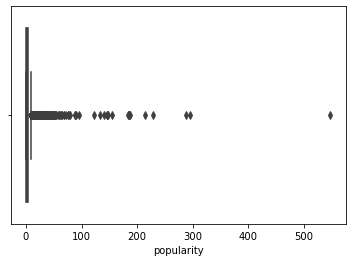

In [37]:
sns.boxplot(movies_metadata_v1['popularity'])

In [38]:
movies_metadata_v1['popularity'].sort_values(ascending=False)

30700   547.48830
33356   294.33704
42222   287.25365
43644   228.03274
24455   213.84991
           ...   
27546     0.00000
42213     0.00000
19729         NaN
29502         NaN
35586         NaN
Name: popularity, Length: 45413, dtype: float64

#### poster_path
* 해당 영화의 포스터이미지 자료로 확인됨 => 학습 데이터상 제외해도 무방할 것으로 판단

In [39]:
movies_metadata_v1['poster_path']

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45413, dtype: object

#### production_companies
* 프로덕션id 및 프로덕션명이 딕셔너리 문자열 형태로 되어 있음 => 프로덕션id 및 프로덕션명을 추출한 신규 컬럼 각각 추가 생성
* 여러 프로덕션이 복합된 영화에 대한 처리방안 추후 검토 필요

In [40]:
movies_metadata_v1['production_companies'].isnull().sum()  # null값 3건 존재함 => 전체 개수 대비 매우 적으므로 제외 처리

3

In [41]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['production_companies'].notnull()]  # null값 제외 처리

In [42]:
movies_metadata_v1['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [43]:
# 문자열 evaluate 적용해 프로덕션id 및 프로덕션명을 추출한 'production_id', 'production_name' 컬럼 각각 생성
movies_metadata_v1['production_id'] = movies_metadata_v1['production_companies'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['production_id'] = movies_metadata_v1['production_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

movies_metadata_v1['production_name'] = movies_metadata_v1['production_companies'].apply(ast.literal_eval)
movies_metadata_v1['production_name'] = movies_metadata_v1['production_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [44]:
movies_metadata_v1[['production_id', 'production_name']]  # 컬럼 생성 결과 확인

,production_id,production_name
0,[3],[Pixar Animation Studios]
1,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[6194, 19464]","[Warner Bros., Lancaster Gate]"
3,[306],[Twentieth Century Fox Film Corporation]
4,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]"
...,...,...
45461,[],[]
45462,[19653],[Sine Olivia]
45463,[6165],[American World Pictures]
45464,[88753],[Yermoliev]


#### production_countries
* 국가 고유 부호 및 국가명이 딕셔너리 문자열 형태로 되어 있음 => 국가 고유 부호 및 국가명을 추출한 신규 컬럼 각각 추가 생성

In [45]:
movies_metadata_v1['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45410, dtype: object

In [46]:
# 문자열 evaluate 적용해 국가 고유부호 및 국가명을 추출한 'prod_countries_code', 'prod_countries_name' 컬럼 각각 생성
movies_metadata_v1['prod_countries_code'] = movies_metadata_v1['production_countries'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['prod_countries_code'] = movies_metadata_v1['prod_countries_code'].apply(lambda x: [v.get('iso_3166_1') for v in x])  # 고유부호만 추출

movies_metadata_v1['prod_countries_name'] = movies_metadata_v1['production_countries'].apply(ast.literal_eval)
movies_metadata_v1['prod_countries_name'] = movies_metadata_v1['prod_countries_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [47]:
movies_metadata_v1[['prod_countries_code', 'prod_countries_name']]  # 컬럼 생성 결과 확인

,prod_countries_code,prod_countries_name
0,[US],[United States of America]
1,[US],[United States of America]
2,[US],[United States of America]
3,[US],[United States of America]
4,[US],[United States of America]
...,...,...
45461,[IR],[Iran]
45462,[PH],[Philippines]
45463,[US],[United States of America]
45464,[RU],[Russia]


#### release_date
* 83건의 null값 데이터 내역 확인 및 null값 제외 처리함
* 연도, 월, 일 컬럼 각각 신규 컬럼 생성 => 학습 데이터에는 월 컬럼을 활용해야 할 것으로 판단됨(필요시 추가 검토)

In [48]:
movies_metadata_v1['release_date'].isnull().sum()  # null값 83건 존재함

83

In [49]:
# null값 데이터 내역 확인 => releast_date가 null값인 데이터에 다른 특성 데이터도 없는 경우가 다수 존재함 확인
movies_metadata_v1[movies_metadata_v1['release_date'].isnull()].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name
711,False,NaN,0.00000,[],NaN,365371,tt0114894,en,War Stories Our Mother Never Told Us,Seven New Zealand women speak about their live...,0.00562,NaN,[],[],NaN,0.00000,95.00000,[],Released,NaN,War Stories Our Mother Never Told Us,False,0.00000,0.00000,[],[],[],[],[],[]
734,False,NaN,0.00000,[],NaN,215107,tt0105737,en,Vermont Is for Lovers,Vermont is for Lovers is an independently prod...,0.75000,NaN,[],[],NaN,0.00000,88.00000,[],Released,NaN,Vermont Is for Lovers,False,0.00000,0.00000,[],[],[],[],[],[]
3460,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,94214,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.00906,NaN,[],[],NaN,10.00000,90.00000,[],NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",False,0.00000,0.00000,[Drama],[18],[],[],[],[]
3628,False,NaN,0.00000,[],NaN,207731,tt0217287,en,Boricua's Bond,"Tommy, a talented Puerto Rican painter living ...",0.03535,NaN,[],[],NaN,0.00000,105.00000,[],Released,NaN,Boricua's Bond,False,2.00000,1.00000,[],[],[],[],[],[]
5879,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,99885,tt0979876,en,Divine Intervention,Four friends fight an insane man's crusade to ...,0.00118,/iXZ6bn4G3nzGChawX9PLLnjMTqI.jpg,[],[],NaN,0.00000,87.00000,[],Released,His Judgement Cometh...,Divine Intervention,False,0.00000,0.00000,"[Drama, Romance, Foreign]","[18, 10749, 10769]",[],[],[],[]


In [50]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['release_date'].notnull()]  # null값 제외 처리

In [51]:
movies_metadata_v1['release_date'] = pd.to_datetime(movies_metadata_v1['release_date'])  # datetime으로 변환
movies_metadata_v1['release_year'] = movies_metadata_v1['release_date'].dt.year  # 연도 컬럼 추출
movies_metadata_v1['release_month'] = movies_metadata_v1['release_date'].dt.month  # 월 컬럼 추출
movies_metadata_v1['release_day'] = movies_metadata_v1['release_date'].dt.day  # 일 컬럼 추출

In [52]:
movies_metadata_v1[['release_year', 'release_month', 'release_day']]  # 생성된 컬럼 확인

,release_year,release_month,release_day
0,1995,10,30
1,1995,12,15
2,1995,12,22
3,1995,12,22
4,1995,2,10
...,...,...,...
45460,1991,5,13
45462,2011,11,17
45463,2003,8,1
45464,1917,10,21


#### revenue
* 해당 영화가 벌어드린 수익으로 확인되며, 데이터의 쏠림현상이 나타남 => 학습 시 영화의 성공여부에 대한 판단 지표 중 하나로 활용 예정

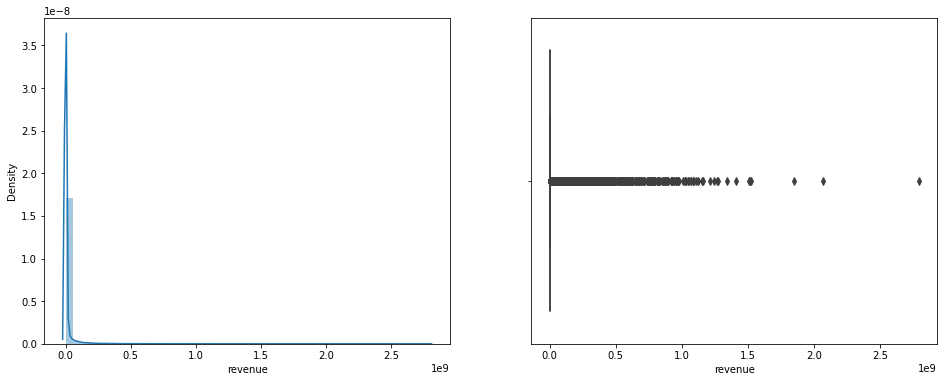

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['revenue'], ax=ax[0])
sns.boxplot(movies_metadata_v1['revenue'], ax=ax[1])
plt.show()

In [54]:
movies_metadata_v1['revenue'].describe()

count        45327.00000
mean      11238364.02102
std       64422983.38057
min              0.00000
25%              0.00000
50%              0.00000
75%              0.00000
max     2787965087.00000
Name: revenue, dtype: float64

#### runtime
* 해당 영화의 러닝타임(분)으로 확인됨. 영화의 특성을 구분짓는 주요 특성 중 하나이므로 null값 246건은 제외 처리함

In [55]:
# null값 246건 존재함 확인 => runtime은 영화의 주요 특성 중 하나이므로 null값인 데이터는 제외 처리하고자 함
movies_metadata_v1['runtime'].isnull().sum()

246

In [56]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['runtime'].notnull()]  # null값 제외 처리

In [57]:
movies_metadata_v1['runtime']

0        81.00000
1       104.00000
2       101.00000
3       127.00000
4       106.00000
           ...   
45460   104.00000
45462   360.00000
45463    90.00000
45464    87.00000
45465    75.00000
Name: runtime, Length: 45081, dtype: float64

#### spoken_languages
* 'original_language' 컬럼과 유사해보이나, 차이가 나는 컬럼도 존재함 확인 => 별도 컬럼 구분 필요함
* 언어 고유부호 및 언어명이 딕셔너리 문자열 형태로 되어 있음 => 언어 고유부호 및 언어명을 추출한 신규 컬럼 각각 추가 생성

In [58]:
# 'original_language' 컬럼과 비교 => 유사해보이나, 차이가 나는 컬럼도 존재함 확인
movies_metadata_v1[['original_language', 'spoken_languages']][:10]

,original_language,spoken_languages
0,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
5,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
6,en,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is..."
7,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
8,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
9,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."


In [59]:
# 문자열 evaluate 적용해 언어 고유부호 및 언어명을 추출한 'spoken_lang_code', 'spoken_lang_name' 컬럼 각각 생성
movies_metadata_v1['spoken_lang_code'] = movies_metadata_v1['spoken_languages'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['spoken_lang_code'] = movies_metadata_v1['spoken_lang_code'].apply(lambda x: [v.get('iso_639_1') for v in x])  # 고유부호만 추출

movies_metadata_v1['spoken_lang_name'] = movies_metadata_v1['spoken_languages'].apply(ast.literal_eval)
movies_metadata_v1['spoken_lang_name'] = movies_metadata_v1['spoken_lang_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [60]:
movies_metadata_v1[['spoken_lang_code', 'spoken_lang_name']]  # 생성된 컬럼 결과 확인

,spoken_lang_code,spoken_lang_name
0,[en],[English]
1,"[en, fr]","[English, Français]"
2,[en],[English]
3,[en],[English]
4,[en],[English]
...,...,...
45460,[en],[English]
45462,[tl],[]
45463,[en],[English]
45464,[],[]


#### status
* "Released", "Rumored", "Post Production", "In Production", "Planned", "Canceled" 총 6가지 종류 구성 확인(null값 76건 제외 처리)
* budget과 revenue가 0인 3개 그룹("In Production", "Planned", "Canceled")은 학습 데이터에서 제외해야 할 것으로 보임 => 추가 검토 예정

In [61]:
movies_metadata_v1['status'].isnull().sum()  # null값 76건 확인 => 상태값이 불분명하므로 제외 처리

76

In [62]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['status'].notnull()]  # null값 제외 처리

In [63]:
movies_metadata_v1['status'].value_counts()  # 6가지 종류 및 개수 확인

Released           44649
Rumored              228
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: status, dtype: int64

In [64]:
movies_metadata_v1[movies_metadata_v1['status'] == 'Planned'].head()  # 각 종류별 데이터 샘플 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,release_day,spoken_lang_code,spoken_lang_name
20108,False,NaN,0.00000,"[{'id': 35, 'name': 'Comedy'}]",NaN,130736,tt2208144,en,3 Zimmer/Küche/Bad,"Eleven moving dates, eight friends: Philipp, W...",1.87683,/5F981JSQz5Qc83G2QZzszwx4ULj.jpg,[{'name': 'teamWorx Produktion für Kino und Fe...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2012-10-03,0.00000,118.00000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Planned,NaN,3 Zimmer/Küche/Bad,False,7.10000,28.00000,[Comedy],[35],[1479],[teamWorx Produktion für Kino und Fernsehen GmbH],[DE],[Germany],2012,10,3,[de],[Deutsch]
20989,False,NaN,0.00000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,118931,tt2332523,ja,放課後ミッドナイターズ,Houkago Midnighters is about a human anatomica...,0.45697,/1UgQ8fhjxmPbNUMgIesmPduRGZb.jpg,"[{'name': 'Mont Blanc Pictures', 'id': 40383},...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2012-08-25,0.00000,95.00000,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Planned,NaN,After School Midnighters,False,6.50000,2.00000,"[Fantasy, Animation, Comedy, Family]","[14, 16, 35, 10751]","[40383, 40384]","[Mont Blanc Pictures, KOO-KI]",[JP],[Japan],2012,8,25,[ja],[日本語]
30402,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,2.17855,/2GwwyfykFAf3jKXFWMkBiLgTi3k.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-11-07,0.00000,0.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.00000,12.00000,"[Thriller, Action, Crime]","[53, 28, 80]","[5, 34, 130, 2481]","[Columbia Pictures, Sony Pictures, Jerry Bruck...",[US],[United States of America],2018,11,7,[en],[English]
37725,False,NaN,0.00000,"[{'id': 99, 'name': 'Documentary'}]",NaN,359440,tt4651932,en,Barista,Five top baristas find themselves pushing the ...,0.85190,/wWnJeF67i2dVfzP7QFBkASn3XP6.jpg,[],[],2015-11-06,0.00000,103.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,The battle for the perfect cup is on.,Barista,False,6.70000,6.00000,[Documentary],[99],[],[],[],[],2015,11,6,[en],[English]
38107,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",http://www.enlightenment-productions.com/despi...,366901,tt2474932,en,Despite the Falling Snow,"In Cold War Moscow, a female spy steals secret...",3.66880,/xfveIBDvr0xi5Uu8RT1AqEY7gBO.jpg,"[{'name': 'Enlightenment Productions', 'id': 1...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2016-01-29,0.00000,113.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,You can betray your country but not your heart.,Despite the Falling Snow,False,4.70000,16.00000,"[Drama, Mystery, Romance, Thriller]","[18, 9648, 10749, 53]","[15073, 67263, 67264]","[Enlightenment Productions, Falling Snow, SK E...","[GB, RS]","[United Kingdom, Serbia]",2016,1,29,[en],[English]


In [65]:
# status 종류별 주요 현황 확인 => budget과 revenue가 0인 3개 그룹은 학습 데이터에서 제외해야 할 것으로 보임(추가 검토 예정)
movies_metadata_v1.pivot_table(
    index=['status'],
    values=['budget', 'revenue', 'vote_average', 'vote_count'],
    aggfunc=np.mean
)

,budget,revenue,vote_average,vote_count
status,,,,
Canceled,0.00000,0.00000,6.30000,3.00000
In Production,0.00000,0.00000,4.55882,32.76471
Planned,0.00000,0.00000,6.10000,15.38462
Post Production,540846.96907,369045.32990,5.09485,17.09278
Released,4296639.76947,11407418.06878,5.64082,111.74248
Rumored,58103.07018,140154.41228,5.38465,6.62719


#### tagline
* 영화의 제목 앞쪽에 붙는 태그라인에 대한 정보로 확인되며, null값 다수 존재함 확인됨 => 학습 데이터상 제외해도 무방할 것으로 판단

In [66]:
movies_metadata_v1['tagline']

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
45460                                                  NaN
45462                                                  NaN
45463                               A deadly game of wits.
45464                                                  NaN
45465                                                  NaN
Name: tagline, Length: 45005, dtype: object

In [67]:
movies_metadata_v1['tagline'].isnull().sum()  # null값 다수 존재함 확인

24637

#### title
* 해당 영화의 영문 제목으로 확인됨

In [68]:
movies_metadata_v1['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45460                     Robin Hood
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45005, dtype: object

In [69]:
# "original_title" 컬럼과의 차이 확인 =>  "title" 컬럼은 원제목을 영어로 표기한 것으로 확인됨
movies_metadata_v1[movies_metadata_v1['original_title'] != movies_metadata_v1['title']][['original_title', 'title']]

,original_title,title
28,La Cité des Enfants Perdus,The City of Lost Children
29,摇啊摇，摇到外婆桥,Shanghai Triad
32,"Guillaumet, les ailes du courage",Wings of Courage
57,Il postino,The Postman
58,Le confessionnal,The Confessional
...,...,...
45451,Nouvelles luttes extravagantes,The Fat and Lean Wrestling Match
45453,Maa,Mom
45455,San Michele aveva un gallo,St. Michael Had a Rooster
45462,Siglo ng Pagluluwal,Century of Birthing


#### video
* 의미가 명확하지는 않으나, 대부분이 False값이며 True인 건(88건)들의 revenue는 모두 0인 것으로 확인됨 => True인 건들을 제외할지 여부는 추후 판단하고자 함

In [70]:
movies_metadata_v1['video'].value_counts()  # 대부분의 값들이 False인 것으로 확인됨

False    44917
True        88
Name: video, dtype: int64

In [71]:
# 그룹별 주요 특성 확인 => True인 그룹의 revenue는 0인 것으로 확인됨
movies_metadata_v1.pivot_table(index=['video'], values=['budget', 'revenue'])

,budget,revenue
video,,
False,4272349.53445,11340863.41376
True,59712.31818,0.00000


In [72]:
movies_metadata_v1[movies_metadata_v1['video'] == True].head()  # 샘플 데이터 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,release_day,spoken_lang_code,spoken_lang_name
5492,False,NaN,0.00000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.73418,/iWahPsY3hsKOizZHgzQcAxv4O3B.jpg,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,0.00000,82.00000,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.40000,22.00000,"[Action, Adventure, Animation, Comedy, Family,...","[28, 12, 16, 35, 10751, 14, 10749]",[3204],[Big Idea Productions],[US],[United States of America],2002,10,4,"[cs, en]","[Český, English]"
11469,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000.00000,"[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,0.65171,/isRGTPFiX8IwM1dNXQ1SUoticvY.jpg,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,0.00000,100.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.30000,16.00000,[Documentary],[99],[5228],[Polar Film Medien GmbH],[US],[United States of America],2006,6,1,[en],[English]
13564,False,NaN,0.00000,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,Fitna,A short film in which Quran verses are shown a...,0.04007,/2xZIYEyp6jUfB8ZMiqvtXRD6tSX.jpg,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,0.00000,15.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Fitna,True,1.00000,1.00000,[Documentary],[99],[],[],[NL],[Netherlands],2008,3,27,"[en, nl]","[English, Nederlands]"
14271,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0.00000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",1.78571,/pO535dqMmvatuqbgvpOIA1bQw3R.jpg,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,0.00000,48.00000,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.70000,3.00000,"[Comedy, Romance, Animation, Music]","[35, 10749, 16, 10402]","[3034, 5937]","[TV Tokyo, Xebec]",[JP],[Japan],2001,3,31,[ja],[日本語]
14608,False,NaN,0.00000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",0.01417,/affnnZunHbXQGxlOGNo2QsGUqnC.jpg,[],[],2009-10-13,0.00000,140.00000,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.00000,0.00000,"[Action, Adventure, Family, Fantasy]","[28, 12, 10751, 14]",[],[],[],[],2009,10,13,"[fr, en, no, pt, th, zh]","[Français, English, Norsk, Português, ภาษาไทย,..."


#### vote_average
* TMDB의 vote average 데이터로 0~10의 값 확인되며, 전체적으로 정규분포와 비슷한 형태이나 학습 시 아웃라이어에 대한 처리가 필요할 것으로 판단됨

In [73]:
movies_metadata_v1['vote_average'].describe()  # 0~10의 값

count   45005.00000
mean        5.63808
std         1.89642
min         0.00000
25%         5.00000
50%         6.00000
75%         6.80000
max        10.00000
Name: vote_average, dtype: float64

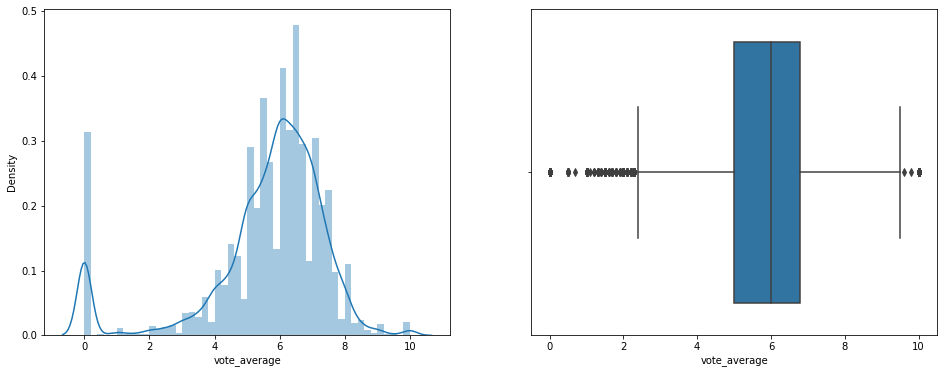

In [74]:
# 분포 확인 => 0점대 부분을 제외하면 전체적으로 정규분포와 비슷한 형태를 나타내고 있음. 학습 시 아웃라이어 처리 필요할 것으로 판단됨
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['vote_average'], ax=ax[0])
sns.boxplot(movies_metadata_v1['vote_average'], ax=ax[1])
plt.show()

#### vote_count
* TMDB의 vote count 데이터로 한쪽으로 많이 쏠려있는 분포가 확인됨 => 추후 학습 진행 시 데이터 분포 관련 조치 필요

In [75]:
movies_metadata_v1['vote_count'].describe()  # 0~14075값으로, 평균은 111수준이나 편차가 큰 것으로 확인됨

count   45005.00000
mean      110.94587
std       493.67039
min         0.00000
25%         3.00000
50%        10.00000
75%        35.00000
max     14075.00000
Name: vote_count, dtype: float64

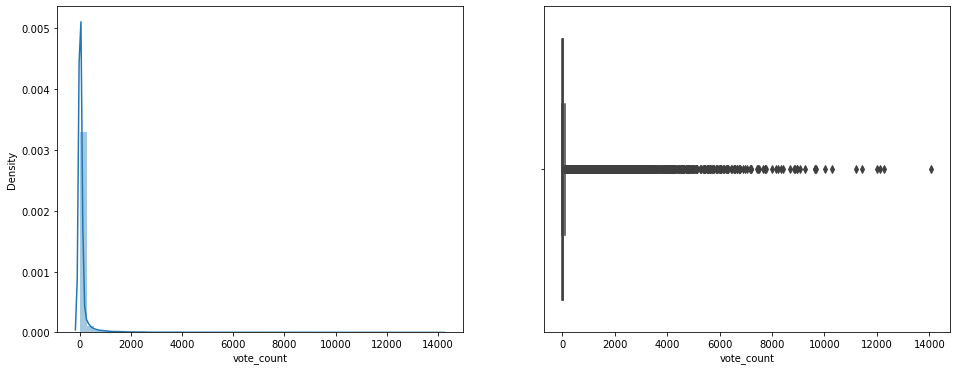

In [76]:
# 분포 확인 => "vote_average"와는 달리 데이터의 쏠림현상이 나타남 확인. 학습 진행 시 조치 필요
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['vote_count'], ax=ax[0])
sns.boxplot(movies_metadata_v1['vote_count'], ax=ax[1])
plt.show()

### 주요 컬럼 위주로 1차 추출해 데이터프레임 저장 => "movies_metadata_v2"

In [77]:
movies_metadata_v1.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genres_name', 'genres_id',
       'production_id', 'production_name', 'prod_countries_code',
       'prod_countries_name', 'release_year', 'release_month', 'release_day',
       'spoken_lang_code', 'spoken_lang_name'],
      dtype='object')

In [78]:
col_names = [
    'id', 'title', 'genres_id', 'genres_name', 'original_language', 'spoken_lang_code', 'spoken_lang_name',
    'popularity', 'production_id', 'production_name', 'prod_countries_code', 'prod_countries_name',
    'release_year', 'release_month', 'budget', 'revenue', 'runtime', 
    'status', 'video', 'vote_average', 'vote_count'
]

movies_metadata_v2 = movies_metadata_v1[col_names]
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000


In [79]:
movies_metadata_v2.reset_index(drop=True, inplace=True)  # index 재설정

In [80]:
movies_metadata_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45005 entries, 0 to 45004
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45005 non-null  object 
 1   title                45005 non-null  object 
 2   genres_id            45005 non-null  object 
 3   genres_name          45005 non-null  object 
 4   original_language    45005 non-null  object 
 5   spoken_lang_code     45005 non-null  object 
 6   spoken_lang_name     45005 non-null  object 
 7   popularity           45005 non-null  float64
 8   production_id        45005 non-null  object 
 9   production_name      45005 non-null  object 
 10  prod_countries_code  45005 non-null  object 
 11  prod_countries_name  45005 non-null  object 
 12  release_year         45005 non-null  int64  
 13  release_month        45005 non-null  int64  
 14  budget               45005 non-null  float64
 15  revenue              45005 non-null 

### 영화 키워드 정보 merge 처리
* keywords.csv 파일을 읽어온 뒤, 문자열로 입력된 keywords 정보를 id와 name별로 구분해 컬럼 생성
* TMDB id 기준으로 기존 메타데이터 데이터프레임과 merge 처리

In [81]:
# keywords.csv 파일 읽어오기
keywords = pd.read_csv('./data/keywords.csv')
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [82]:
keywords['id'].value_counts()  # 데이터상 중복 데이터가 있음을 확인함

141971    3
159849    3
105045    2
255396    2
85729     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: id, Length: 45432, dtype: int64

In [83]:
keywords[keywords['id'] == 159849]  # 중복된 데이터 내역 확인 => id 기준 중복 데이터 제외 필요

,id,keywords
13220,159849,[]
35795,159849,[]
36752,159849,[]


In [84]:
keywords.drop_duplicates('id', inplace=True)  # id 기준 중복 데이터 제외 처리
keywords['id'].value_counts().head()

862       1
74458     1
296206    1
107308    1
16247     1
Name: id, dtype: int64

In [85]:
# 문자열 evaluate 적용해 키워드id 및 키워드명을 추출한 'keywords_id', 'keywords_name' 컬럼 각각 생성
keywords['keywords_id'] = keywords['keywords'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
keywords['keywords_id'] = keywords['keywords_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

keywords['keywords_name'] = keywords['keywords'].apply(ast.literal_eval)
keywords['keywords_name'] = keywords['keywords_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [86]:
keywords.head()  # 컬럼 생성 결과 확인

,id,keywords,keywords_id,keywords_name
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug..."


In [87]:
keywords['id'] = keywords['id'].astype(str)
keywords.drop('keywords', axis=1, inplace=True)
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 46418
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             45432 non-null  object
 1   keywords_id    45432 non-null  object
 2   keywords_name  45432 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


#### 기존 메타데이터 데이터프레임(movies_metadata_v2)과 Merge 처리

In [88]:
movies_metadata_v2 = pd.merge(movies_metadata_v2, keywords, on='id', how='left')
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug..."


### 영화 출연진 및 제작진 정보 merge 처리
* credits.csv 파일을 읽어온 뒤, 문자열로 입력된 각 출연진 및 제작진 정보를 id와 name별로 구분해 컬럼 생성
* TMDB id 기준으로 기존 메타데이터 데이터프레임과 merge 처리

In [89]:
credits = pd.read_csv('./data/credits.csv')
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [90]:
credits['id'].value_counts()  # 중복 데이터 존재 확인

141971    3
298721    2
9755      2
10991     2
99080     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: id, Length: 45432, dtype: int64

In [91]:
credits.drop_duplicates('id', inplace=True)  # id 기준 중복 데이터 제외 처리
credits['id'].value_counts().head()

862       1
74458     1
296206    1
107308    1
16247     1
Name: id, dtype: int64

In [92]:
credits['cast'][0]  # 해당 내용 중 배우id 및 배우명만 추출해 컬럼으로 저장하고자 함

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [93]:
# 문자열 evaluate 적용해 배우id 및 배우명을 추출한 'cast_id', 'cast_name' 컬럼 각각 생성
credits['cast_id'] = credits['cast'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
credits['cast_id'] = credits['cast_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

credits['cast_name'] = credits['cast'].apply(ast.literal_eval)
credits['cast_name'] = credits['cast_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [94]:
credits.head()  # 컬럼 생성 결과 확인

,cast,crew,id,cast_id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [95]:
credits['crew'][0][:900]  # 제작진 리스트가 매우 다양하므로 우선순위가 높은 5번째까지의 해당 id, job, name만 추출해 컬럼으로 우선 저장하고자 함

"[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'p"

In [96]:
# 문자열 evaluate 적용해 앞에서 5번째까지의 id, job, name만을 추출한 'crew_main' 컬럼 생성
credits['crew_main'] = credits['crew'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
credits['crew_main'] = credits['crew_main'].apply(lambda x: [[v.get('id'), v.get('job'), v.get('name')] for i, v in enumerate(x) if i < 5]) 

In [97]:
credits['crew_main'][0]  # 컬럼 생성 결과 확인

[[7879, 'Director', 'John Lasseter'],
 [12891, 'Screenplay', 'Joss Whedon'],
 [7, 'Screenplay', 'Andrew Stanton'],
 [12892, 'Screenplay', 'Joel Cohen'],
 [12893, 'Screenplay', 'Alec Sokolow']]

In [98]:
credits['id'] = credits['id'].astype(str)
credits.drop('cast', axis=1, inplace=True)  # merge를 위해 cast컬럼은 drop
credits.drop('crew', axis=1, inplace=True)  # merge를 위해 crew컬럼은 drop
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45432 non-null  object
 1   cast_id    45432 non-null  object
 2   cast_name  45432 non-null  object
 3   crew_main  45432 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [99]:
credits.head()

,id,cast_id,cast_name,crew_main
0,862,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


#### 기존 메타데이터 데이터프레임(movies_metadata_v2)과 Merge 처리

In [100]:
movies_metadata_v2 = pd.merge(movies_metadata_v2, credits, on='id', how='left')
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


In [101]:
movies_metadata_v2 = movies_metadata_v2[movies_metadata_v2['keywords_id'].notnull()]  # null값 1건 제외 처리
movies_metadata_v2.reset_index(drop=True, inplace=True)  # index 재설정

# 데이터프레임 현황(1차 컬럼 정리 버전) => "movies_metadata_v2"
* 고유한 id값 기준 총 45004건의 영화별 26개 컬럼에 대한 데이터프레임

In [102]:
movies_metadata_v2.shape

(45004, 26)

In [103]:
movies_metadata_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45004 entries, 0 to 45003
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45004 non-null  object 
 1   title                45004 non-null  object 
 2   genres_id            45004 non-null  object 
 3   genres_name          45004 non-null  object 
 4   original_language    45004 non-null  object 
 5   spoken_lang_code     45004 non-null  object 
 6   spoken_lang_name     45004 non-null  object 
 7   popularity           45004 non-null  float64
 8   production_id        45004 non-null  object 
 9   production_name      45004 non-null  object 
 10  prod_countries_code  45004 non-null  object 
 11  prod_countries_name  45004 non-null  object 
 12  release_year         45004 non-null  int64  
 13  release_month        45004 non-null  int64  
 14  budget               45004 non-null  float64
 15  revenue              45004 non-null 

In [104]:
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


#### csv파일로 저장

In [105]:
movies_metadata_v2.to_csv('./data/movies_metadata_v2.csv')

# EDA 및 전처리(2차)

* 예측 지표 선정 및 주요 Feature별 세부검토 진행

#### csv파일 읽어오기

In [106]:
data_v0 = pd.read_csv('./data/movies_metadata_v2.csv', index_col=0)
data_v0.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",en,['en'],['English'],21.94694,[3],['Pixar Animation Studios'],['US'],['United States of America'],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","['jealousy', 'toy', 'boy', 'friendship', 'frie...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[[7879, 'Director', 'John Lasseter'], [12891, ..."
1,8844,Jumanji,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']",en,"['en', 'fr']","['English', 'Français']",17.01554,"[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],['United States of America'],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","['board game', 'disappearance', ""based on chil...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[[511, 'Executive Producer', 'Larry J. Franco'..."
2,15602,Grumpier Old Men,"[10749, 35]","['Romance', 'Comedy']",en,['en'],['English'],11.71290,"[6194, 19464]","['Warner Bros.', 'Lancaster Gate']",['US'],['United States of America'],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","['fishing', 'best friend', 'duringcreditssting...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","[[26502, 'Director', 'Howard Deutch'], [16837,..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","['Comedy', 'Drama', 'Romance']",en,['en'],['English'],3.85949,[306],['Twentieth Century Fox Film Corporation'],['US'],['United States of America'],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","['based on novel', 'interracial relationship',...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","['Whitney Houston', 'Angela Bassett', 'Loretta...","[[2178, 'Director', 'Forest Whitaker'], [5144,..."
4,11862,Father of the Bride Part II,[35],['Comedy'],en,['en'],['English'],8.38752,"[5842, 9195]","['Sandollar Productions', 'Touchstone Pictures']",['US'],['United States of America'],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","['baby', 'midlife crisis', 'confidence', 'agin...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","['Steve Martin', 'Diane Keaton', 'Martin Short...","[[37, 'Original Music Composer', 'Alan Silvest..."


## 예측 지표 선정 검토
### 예측 지표 선정(안)
1) 순수익 => 관련 컬럼 : "revenue", "budget"
2) 투표평균 => 관련 컬럼 : "vote_average"
3) 투표수 => 관련 컬럼 : "vote_count"


### 예측 지표 1) 순수익 지표 정의 및 검토(안)
* 기존 데이터에 기반해 "profit" 컬럼을 신규 산출해 순수익 지표로 활용
    - 산출식 : revenue - budget

#### 순수익("profit") 컬럼 생성

In [107]:
data_v0['profit'] = data_v0['revenue'] - data_v0['budget']
data_v0['profit'].head()

0   343554033.00000
1   197797249.00000
2           0.00000
3    65452156.00000
4    76578911.00000
Name: profit, dtype: float64

In [108]:
data_v0['profit'].describe()

count        45004.00000
mean       7054732.54006
std       52398977.00378
min     -165710090.00000
25%              0.00000
50%              0.00000
75%              0.00000
max     2550965087.00000
Name: profit, dtype: float64

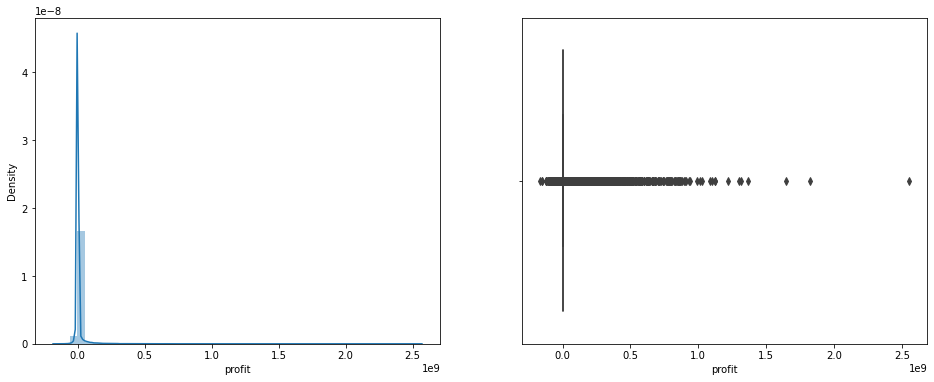

In [109]:
# "profit" 분포 확인 => (+)값부터 (-)까지 존재하며, 쏠림이 매우 크게 나타나는 것으로 확인됨
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v0['profit'], ax=ax[0])
sns.boxplot(data_v0['profit'], ax=ax[1])
plt.show()

In [110]:
# 'status'별 분류 및 현황 확인 => budget 및 revenue가 0인 3개 그룹 총 31건은 제외할 필요가 있다고 판단됨
data_v0.pivot_table(index='status', values=['budget', 'revenue', 'profit'], aggfunc=[np.mean, len])

mean                                 len         \
                       budget        profit        revenue budget profit   
status                                                                     
Canceled              0.00000       0.00000        0.00000      1      1   
In Production         0.00000       0.00000        0.00000     17     17   
Planned               0.00000       0.00000        0.00000     13     13   
Post Production  540846.96907 -171801.63918   369045.32990     97     97   
Released        4296736.00311 7110937.56240 11407673.56551  44648  44648   
Rumored           58103.07018   82051.34211   140154.41228    228    228   

                         
                revenue  
status                   
Canceled              1  
In Production        17  
Planned              13  
Post Production      97  
Released          44648  
Rumored             228

In [111]:
data_v0 = data_v0.query("status == 'Released' or status == 'Rumored' or status =='Post Production'")  # 3개 그룹만 선택
data_v0.shape  # 제외 후 총 44973건 데이터 확인

(44973, 27)

In [112]:
# 각 컬럼별 0인 데이터 개수 체크 => 0인 데이터가 지나지체 많이 존재함
list(data_v0['budget']).count(0), list(data_v0['revenue']).count(0), list(data_v0['profit']).count(0)

(36111, 37583, 34115)

> ### (이슈사항1)
> * 순수익 지표("profit")를 산출하는 "revenue", "budget" 컬럼 자체에 값이 0인 데이터가 너무 많이 존재함
> * 예측 지표로서 "profit"을 활용할지에 대한 검토 및 판단 필요함

### 예측 지표 2) 투표평균("vote_average") 지표 관련 검토

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

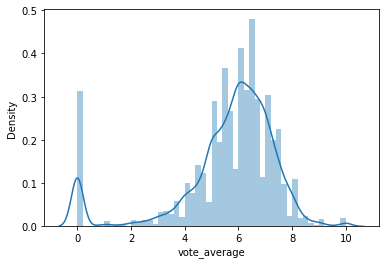

In [113]:
sns.distplot(data_v0['vote_average'])

In [114]:
# vote_average가 0인 데이터의 특성 확인 => 0이 아닌 데이터에 비해 vote_count 건수 자체가 매우 적음
print("vote_average가 0인 데이터의 vote_count 평균 :", data_v0[data_v0['vote_average'] == 0]['vote_count'].mean())
print("vote_average가 0이 아닌 데이터의 vote_count 평균 :", data_v0[data_v0['vote_average'] != 0]['vote_count'].mean())

vote_average가 0인 데이터의 vote_count 평균 : 0.06385242993969492
vote_average가 0이 아닌 데이터의 vote_count 평균 : 118.42717179864307


>  vote_average가 0인 데이터는 관객들로부터 별로 관심을 얻지 못한 영화의 특성을 나타내는 것으로 예상 가능 => 제외할 필요는 없는 것으로 판단됨

#### vote_average 그룹핑 컬럼 생성 => "vote_average_grade" 컬럼
* 10개 grade 분류
* 분류 기준
    - 0이상 1이하 : 0
    - 1초과 2이하 : 1
    - (중간은 동일한 기준 적용)
    - 9초과 10이하 : 10

In [115]:
range_list = [v for v in range(0, 11)]

data_v0['vote_average_grage'] = pd.cut(data_v0['vote_average'], range_list, labels=range_list[:-1], right=True)  # 10개 grade로 나누기
data_v0['vote_average_grage'] = data_v0['vote_average_grage'].fillna(0)  # 0인 값이 NaN으로 표기되므로, NaN값 0으로 입력하기

In [116]:
data_v0['vote_average_grage'].unique()

[7, 6, 5, 3, 8, 2, 4, 0, 9, 1]
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [117]:
len(data_v0[data_v0['revenue'] == 0])

37583

<AxesSubplot:xlabel='release_year', ylabel='count'>

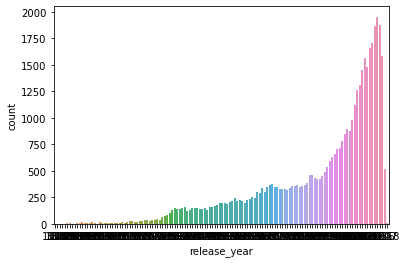

In [118]:
sns.countplot(data_v0['release_year'])

In [119]:
pd.options.display.max_rows = 50

In [120]:
tmp_df = data_v0.copy()

In [121]:
data_v0.query("revenue != 0 and budget != 0 and release_year >= 2000").pivot_table(index='release_year', values=['revenue'], aggfunc=len, margins=True)

,revenue
release_year,
2000,133
2001,146
2002,157
2003,140
2004,173
2005,188
2006,217
2007,198
2008,208


# 팀 회의 후 논의된 기준 반영
## 1. 논의된 기준 반영한 data 추출 => "data_v1"으로 저장
#### * data_v1 추출 기준
1) release_date 컬럼 기준, 2000년 이후의 데이터 => 비교적 최근의 데이터를 기준으로 학습하기 위함<br/>
2) revenue와 budget 컬럼의 값이 모두 0이 아닌 데이터 => 영화의 성공여부를 판단하는 주요 지표로서 순수익을 산출해 학습에 반영하기 위함<br/>
3) keywords 컬럼이 비어있지 않는 데이터 => 해당 영화의 특성을 나타내는 주요 지표로 keywords를 활용해 테스트해보기 위함

#### * data_v1 기준 총 데이터 개수 => 3,154개

In [122]:
data_v1 = data_v0.query("revenue != 0 and budget != 0 and release_year >= 2000 and keywords_name != '[]'")
data_v1.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,profit,vote_average_grage
3048,10471,Next Friday,[35],['Comedy'],en,['en'],['English'],10.06545,[12],['New Line Cinema'],['US'],['United States of America'],2000,1,11000000.00000,59827328.00000,98.00000,Released,False,6.50000,145.00000,"[378, 1522, 2987, 7858, 9748, 9777, 10685, 126...","['prison', 'repayment', 'gang war', 'boy gang'...","[9778, 51944, 57389, 56902, 65132, 16429, 4807...","['Ice Cube', 'Mike Epps', 'Justin Pierce', 'Jo...","[[52112, 'Director', 'Steve Carr'], [9778, 'Ex...",48827328.00000,6
3061,10384,Supernova,"[27, 878, 53]","['Horror', 'Science Fiction', 'Thriller']",en,['en'],['English'],5.49662,"[60, 8411, 20375, 23587]","['United Artists', 'Metro-Goldwyn-Mayer (MGM)'...","['CH', 'US']","['Switzerland', 'United States of America']",2000,1,90000000.00000,14828081.00000,91.00000,Released,False,4.90000,109.00000,"[577, 1472, 2964, 3412, 5100, 222423]","['black people', 'starships', 'future', 'star'...","[13548, 9780, 5694, 38560, 56857, 17346, 54453...","['James Spader', 'Angela Bassett', 'Robert For...","[[1723, 'Director', 'Walter Hill'], [2121, 'Ca...",-75171919.00000,4
3109,75531,Isn't She Great,"[18, 35]","['Drama', 'Comedy']",de,['en'],['English'],0.90793,"[33, 762, 882, 3324, 4650, 7237, 10513]","['Universal Pictures', 'Mutual Film Company', ...",['US'],['United States of America'],2000,1,36000000.00000,3003296.00000,95.00000,Released,False,4.60000,14.00000,[1646],['autism'],"[73931, 78729, 8893, 11076, 8930, 14101, 2956,...","['Bette Midler', 'Nathan Lane', 'Stockard Chan...","[[284, 'Executive Producer', 'Gary Levinsohn']...",-32996704.00000,4
3143,4234,Scream 3,"[27, 9648]","['Horror', 'Mystery']",en,['en'],['English'],9.73837,"[85, 1600, 7405]","['Konrad Pictures', 'Craven-Maddalena Films', ...",['US'],['United States of America'],2000,2,40000000.00000,161834276.00000,116.00000,Released,False,5.70000,749.00000,"[2546, 2573, 2793, 8440, 12193, 12339, 13124, ...","['mask', 'metal detector', 'film director', 'e...","[15234, 9206, 14405, 18352, 35595, 2714, 35598...","['David Arquette', 'Neve Campbell', 'Courteney...","[[5140, 'Director', 'Wes Craven'], [26458, 'Ch...",121834276.00000,5
3146,29076,Gun Shy,"[28, 35, 10749, 53]","['Action', 'Comedy', 'Romance', 'Thriller']",en,['en'],['English'],6.37010,"[915, 4258]","['Hollywood Pictures', 'Fortis Films']",['US'],['United States of America'],2000,2,10000000.00000,1631839.00000,101.00000,Released,False,5.40000,24.00000,"[293, 10175, 15274]","['female nudity', 'drug cartel', 'nervous brea...","[18277, 3896, 17485, 10963, 52422, 31028, 1980...","['Sandra Bullock', 'Liam Neeson', 'Oliver Plat...","[[95818, 'Director', 'Eric Blakeney'], [95818,...",-8368161.00000,5


In [123]:
data_v1.reset_index(drop=True, inplace=True)  # index 셋팅
data_v1.info()  # 정보 확인 => 총 3,154건 데이터로 null값 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   3154 non-null   int64   
 1   title                3154 non-null   object  
 2   genres_id            3154 non-null   object  
 3   genres_name          3154 non-null   object  
 4   original_language    3154 non-null   object  
 5   spoken_lang_code     3154 non-null   object  
 6   spoken_lang_name     3154 non-null   object  
 7   popularity           3154 non-null   float64 
 8   production_id        3154 non-null   object  
 9   production_name      3154 non-null   object  
 10  prod_countries_code  3154 non-null   object  
 11  prod_countries_name  3154 non-null   object  
 12  release_year         3154 non-null   int64   
 13  release_month        3154 non-null   int64   
 14  budget               3154 non-null   float64 
 15  revenue              

## 2. 분석 방향 설정
* 팀 회의 후, 현 data를 기반으로 팀원별 각자의 시나리오별 접근 및 분석을 진행하기로 함
* 본 자료에서는 영화의 성공여부를 판단하는 주요 지표로서 순수익지표("profit")를 산출해 모델링 및 예측을 진행하고자 함
* 순수익 지표 산출식 : (revenue - budget) / 1,000,000
    - 금액단위가 크므로 백만달러 단위로 입력

#### 순수익 지표 현황 확인

In [125]:
# 백만달러 단위로 변환
data_v1['profit'] = data_v1['profit'] / 1000000

In [126]:
data_v1['profit'].describe()  # 통계량 현황 확인

count   3154.00000
mean      73.61397
std      162.27609
min     -165.71009
25%       -1.69331
50%       16.02731
75%       80.03085
max     2550.96509
Name: profit, dtype: float64

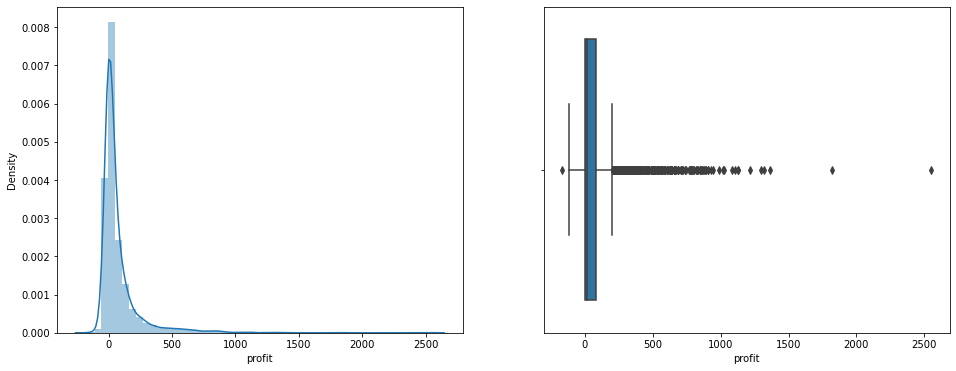

In [127]:
# "profit" 분포 확인 => (+)값부터 (-)까지 존재하며, 0 근처에 데이터가 많이 쏠려있는 경향이 나타남(학습 시 참조 필요)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v1['profit'], ax=ax[0])
sns.boxplot(data_v1['profit'], ax=ax[1])
plt.show()

> 학습 시 성능 향상을 위해 현 상태에서 극단적인 아웃라이어는 제외 처리하고자 함

In [128]:
data_v1['profit'].min()  # min값 확인

-165.71009

In [129]:
data_v1 = data_v1[data_v1['profit'] > -150]  # -150 이하 건 아웃라이어 제외
data_v1 = data_v1[data_v1['profit'] < 1500]  # 1500 이상 건 아웃라이어 제외

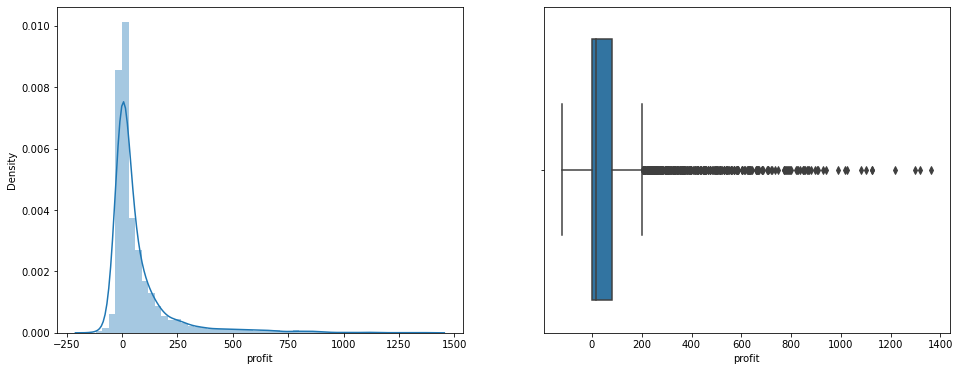

In [130]:
# "profit" 분포 재확인 => 극단적인 아웃라이어 제외된 상태 확인
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v1['profit'], ax=ax[0])
sns.boxplot(data_v1['profit'], ax=ax[1])
plt.show()

In [131]:
profit_min = data_v1['profit'].min()
profit_min  # min값 확인

-119.180039

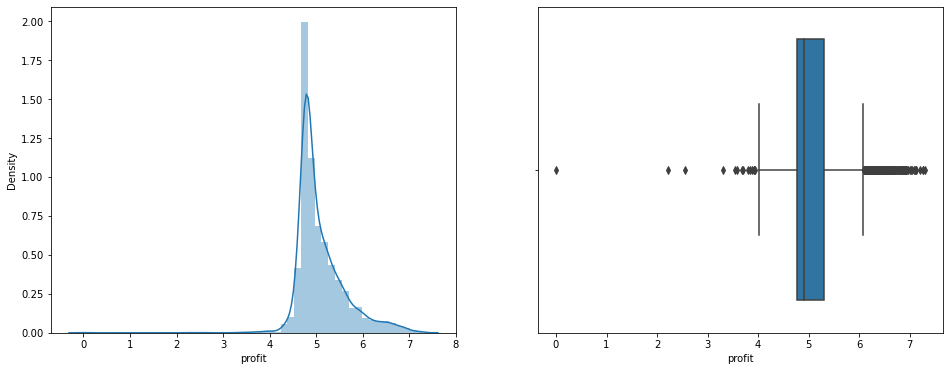

In [132]:
# log 적용 후 분포 확인 => (-)값을 (+)값으로 바꾸기 위해 profit_min을 더해준 값으로 log 적용
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(np.log1p(data_v1['profit'] - profit_min), ax=ax[0])
sns.boxplot(np.log1p(data_v1['profit'] - profit_min), ax=ax[1])
plt.show()

> log 적용 전 보다는 쏠림현상이 줄어든 것으로 보임 => 추후 학습 시 성능 차이 테스트 예정

# 피쳐엔지니어링 및 모델링

### 기본 설정
* 학습은 우선 랜덤포레스트를 기반으로 결과를 확인해가며 피쳐 엔지니어링 과정을 통해 성능을 향상시키는 데에 집중하고자 함
* 이후 하이퍼파라미터 튜닝 및 다른 모델 적용 등의 테스트를 통해 최적의 모델링을 찾아나가고자 함
* 모델 평가지표는 RMSE 활용

## 피쳐엔지니어링 및 모델링(1차)

### Feature 관련 조치사항
* 1차적으로 현 데이터 기준 바로 사용 가능한 컬럼으로 테스트
* "original_language"은 라벨 인코딩 후 반영
* 컬럼별 극단적인 아웃라이어 제외 처리

In [134]:
# 현 데이터 기준 "profit"과의 컬럼간 상관관계 분석
data_v1.corr()['profit'].sort_values()

id              0.00313
release_month   0.02486
release_year    0.08976
runtime         0.19203
vote_average    0.23146
popularity      0.41748
budget          0.63083
vote_count      0.76945
revenue         0.98111
profit          1.00000
video               NaN
Name: profit, dtype: float64

> 우선 현재 기준 확인 가능한 "profit"과의 상관관계를 보면 위와 같이 확인됨

> 예측을 하는 시점에서 확인이 어려운 지표들("revenue", "vote_count" 등)은 우선 학습데이터에서 제외하고 진행하고자 함

#### original_language 라벨 인코딩

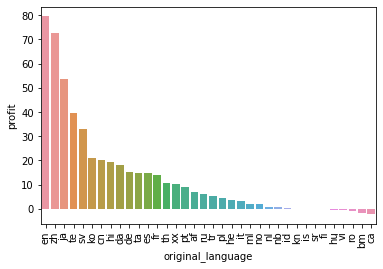

In [135]:
# "original_language" 컬럼 언어별 profit 차이 시각화 => 언어별 의미있는 차이가 있는 것으로 확인됨
lang_profit = data_v1.pivot_table(
                        index='original_language',
                        values=['profit'],
                        aggfunc=np.mean).sort_values(by='profit', ascending=False)
sns.barplot(x=lang_profit.index, y=lang_profit['profit'], data=lang_profit)
plt.xticks(rotation=90)
plt.show()

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [137]:
data_v1['original_language_le'] = le.fit_transform(data_v1['original_language'])
data_v1.head(3)  # 변환된 컬럼 확인

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,profit,vote_average_grage,original_language_le
0,10471,Next Friday,[35],['Comedy'],en,['en'],['English'],10.06545,[12],['New Line Cinema'],['US'],['United States of America'],2000,1,11000000.00000,59827328.00000,98.00000,Released,False,6.50000,145.00000,"[378, 1522, 2987, 7858, 9748, 9777, 10685, 126...","['prison', 'repayment', 'gang war', 'boy gang'...","[9778, 51944, 57389, 56902, 65132, 16429, 4807...","['Ice Cube', 'Mike Epps', 'Justin Pierce', 'Jo...","[[52112, 'Director', 'Steve Carr'], [9778, 'Ex...",48.82733,6,6
1,10384,Supernova,"[27, 878, 53]","['Horror', 'Science Fiction', 'Thriller']",en,['en'],['English'],5.49662,"[60, 8411, 20375, 23587]","['United Artists', 'Metro-Goldwyn-Mayer (MGM)'...","['CH', 'US']","['Switzerland', 'United States of America']",2000,1,90000000.00000,14828081.00000,91.00000,Released,False,4.90000,109.00000,"[577, 1472, 2964, 3412, 5100, 222423]","['black people', 'starships', 'future', 'star'...","[13548, 9780, 5694, 38560, 56857, 17346, 54453...","['James Spader', 'Angela Bassett', 'Robert For...","[[1723, 'Director', 'Walter Hill'], [2121, 'Ca...",-75.17192,4,6
2,75531,Isn't She Great,"[18, 35]","['Drama', 'Comedy']",de,['en'],['English'],0.90793,"[33, 762, 882, 3324, 4650, 7237, 10513]","['Universal Pictures', 'Mutual Film Company', ...",['US'],['United States of America'],2000,1,36000000.00000,3003296.00000,95.00000,Released,False,4.60000,14.00000,[1646],['autism'],"[73931, 78729, 8893, 11076, 8930, 14101, 2956,...","['Bette Midler', 'Nathan Lane', 'Stockard Chan...","[[284, 'Executive Producer', 'Gary Levinsohn']...",-32.99670,4,5


#### "budget" 컬럼 아웃라이어 제외 처리

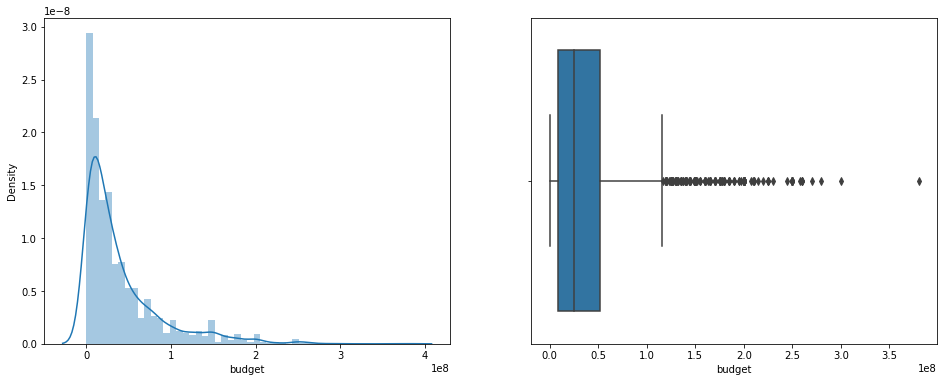

In [138]:
# "budget" 분포 확인 => 300,000,000 이상 건 아웃라이어 제외 처리하고자 함
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v1['budget'], ax=ax[0])
sns.boxplot(data_v1['budget'], ax=ax[1])
plt.show()

In [139]:
data_v1 = data_v1[data_v1['budget'] < 300000000]  # 300,000,000 이상 건 아웃라이어 제외 처리

#### "runtime" 컬럼 아웃라이어 제외 처리

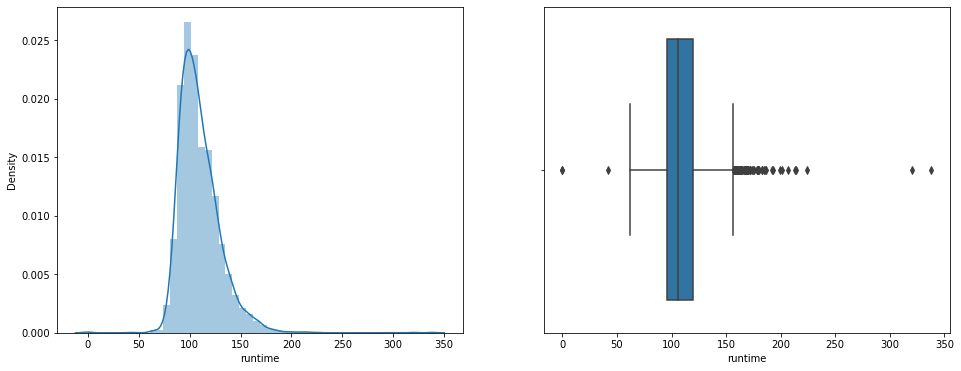

In [140]:
# "runtime" 분포 확인 => 50분 이하 및 250분 이상인 아웃라이어 제외 처리하고자 함
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v1['runtime'], ax=ax[0])
sns.boxplot(data_v1['runtime'], ax=ax[1])
plt.show()

In [141]:
data_v1 = data_v1[data_v1['runtime'] > 50]  # 50 이하 건 아웃라이어 제외 처리
data_v1 = data_v1[data_v1['runtime'] < 250]  # 250 이상 건 아웃라이어 제외 처리

#### "genres_name" 미입력 데이터 제외 처리

In [142]:
data_v1[data_v1["genres_name"] == '[]']  # 2건 미입력 데이터 존재함

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,profit,vote_average_grage,original_language_le
580,1777,Fahrenheit 9/11,[],[],en,"['ar', 'en']","['العربية', 'English']",6.83946,"[225, 8734]","['BIM Distribuzione', 'Fellowship Adventure Gr...",['US'],['United States of America'],2004,6,6000000.00000,119114517.00000,122.00000,Released,False,6.90000,403.00000,"[238179, 238240, 238241]","['skab under tv', 'Øverste hylde', 'foran']","[380, 17087, 19011, 880, 18746, 19013, 120576,...","['Robert De Niro', 'Michael Moore', 'George W....","[[17087, 'Director', 'Michael Moore'], [17087,...",113.11452,6,6
2799,141520,Rita's Last Fairy Tale,[],[],en,['ru'],['Pусский'],0.56068,[],[],['RU'],['Russia'],2012,11,200000.00000,486937.00000,100.00000,Released,False,7.40000,8.00000,[187056],['woman director'],"[1133933, 1133934, 1118002, 39789]","['Mitya Borisov', 'Lev Danilkin', 'Sergei Debi...","[[32564, 'Director', 'Renata Litvinova'], [325...",0.28694,7,6


In [143]:
data_v1 = data_v1[data_v1['genres_name'] != '[]']  # 내용 미입력 데이터 제외 처리

#### 학습 및 성능 측정

In [144]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_v1.drop(columns="profit"), data_v1["profit"],
                                                    test_size=0.2, random_state=42)

# 학습데이터 컬럼 1차 설정 => 초반 테스트용
col_v1 = ['original_language_le', 'budget', 'runtime']

X_train1 = X_train[col_v1]
y_train1 = y_train

X_test1 = X_test[col_v1]
y_test1 = y_test

In [145]:
X_train1.head()  # 현재 기준 X_train 컬럼 현황(최소한의 컬럼만 존재)

,original_language_le,budget,runtime
2311,6,50000000.00000,115.00000
762,6,30000000.00000,97.00000
1494,6,6000000.00000,104.00000
1230,6,58000000.00000,114.00000
221,6,12000000.00000,93.00000


In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()

In [147]:
rf.fit(X_train1, y_train1)

pred_tr = rf.predict(X_train1)
pred_test = rf.predict(X_test1)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train1, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test1, pred_test)))

Train Data RMSE : 57.67754592646633
Test Data RMSE : 138.13631167216087


> 현재 기준 위와 같이 결과가 확인되며, 이후의 피쳐엔지니어링 및 모델링 과정을 통해 성능을 비교해 판단하고자 함

#### "profit" 지표에 log 적용 후 학습한 결과 성능 테스트

In [148]:
profit_min = y_train1.min()
profit_min  # min값 확인

-119.180039

In [149]:
rf.fit(X_train1, np.log1p(y_train1 - profit_min))  # 양수값 기준 log 적용("- profit_min")

pred_tr = np.exp(rf.predict(X_train1)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")
pred_test = np.exp(rf.predict(X_test1)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train1, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test1, pred_test)))

Train Data RMSE : 65.55636545237375
Test Data RMSE : 136.0500934976432


> Test 데이터에서는 성능이 조금 향상됐으나, Train 데이터에서는 오히려 성능이 저하됨 => 현재는 컬럼수가 적으므로 이후 Feature 추가된 버전으로 재검토 예정

## 피쳐엔지니어링 및 모델링(2차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "genres_name" 컬럼에서 장르별 점수 산출 및 해당 영화에 대한 장르 종합점수를 계산한 컬럼 추가

In [150]:
# 현재 기준으로 분류된 train, test 데이터 기준으로 이후에도 동일하게 테스트 진행 시 활용 예정
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2513, 28), (2513,), (629, 28), (629,))

In [151]:
# 전체 데이터로 합치기 => "alldata"
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
alldata = pd.concat([train, test])
alldata.reset_index(drop=True, inplace=True)

### "genres_name" 적용방안 검토
* 총 19가지 장르가 존재함.
* 단, 영화별로 여러 장르가 한꺼번에 입력된 경우가 많아 각각의 장르별 점수를 산출해 영화별 장르에 대한 종합점수를 계산하고자 함

In [152]:
# 장르 종류 확인 => 현 data 기준 총 19가지 장르가 있음
genres_total = alldata['genres_name'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
genre_count = {}

for v in genres_total:
    for genre in v:
        if genre_count.get(genre) == None:
            genre_count[genre] = 1
        else:
            genre_count[genre] += 1

len(genre_count), genre_count

(19,
 {'Action': 846,
  'Thriller': 912,
  'Adventure': 562,
  'Horror': 318,
  'Drama': 1516,
  'Comedy': 1083,
  'Romance': 563,
  'Western': 31,
  'History': 130,
  'War': 105,
  'Crime': 486,
  'Science Fiction': 352,
  'Fantasy': 304,
  'Mystery': 255,
  'Animation': 206,
  'Family': 334,
  'Foreign': 15,
  'Documentary': 45,
  'Music': 92})

In [153]:
# 영화 장르별 컬럼을 반영한 데이터프레임 생성
genres_df = data_v1[['genres_name', 'profit']]

for i, v in genres_df.iterrows():
    for genre in ast.literal_eval(v['genres_name']):
        genres_df.loc[i, genre] = 1  # 해당 장르의 컬럼에 1을 입력

genres_df.head()

,genres_name,profit,Comedy,Horror,Science Fiction,Thriller,Drama,Mystery,Action,Romance,Adventure,Animation,Family,Crime,Music,History,War,Western,Fantasy,Documentary,Foreign
0,['Comedy'],48.82733,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Horror', 'Science Fiction', 'Thriller']",-75.17192,NaN,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Drama', 'Comedy']",-32.99670,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['Horror', 'Mystery']",121.83428,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['Action', 'Comedy', 'Romance', 'Thriller']",-8.36816,1.00000,NaN,NaN,1.00000,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# 장르별 점수 산출 => 각각의 장르에 해당하는 영화의 "profit" 평균을 계산해 장르별 점수로 반영
genre_score = {}
for genre in genre_count.keys():
    score = genres_df[genres_df[genre] == 1]["profit"].mean()
    genre_score[genre] = round(score, 2)

genre_score

{'Action': 110.06,
 'Thriller': 57.6,
 'Adventure': 181.62,
 'Horror': 44.18,
 'Drama': 38.79,
 'Comedy': 67.25,
 'Romance': 49.82,
 'Western': 38.22,
 'History': 37.11,
 'War': 48.67,
 'Crime': 47.19,
 'Science Fiction': 126.71,
 'Fantasy': 172.53,
 'Mystery': 52.95,
 'Animation': 191.37,
 'Family': 175.54,
 'Foreign': 1.74,
 'Documentary': 15.5,
 'Music': 61.28}

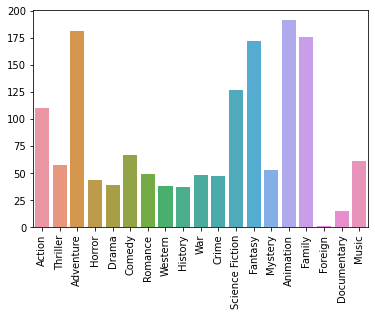

In [155]:
# 계산 결과 시각화 => 장르별로 계산된 결과가 의미있는 차이를 보이고 있음
sns.barplot(x=list(genre_score.keys()), y=list(genre_score.values()))
plt.xticks(rotation=90)
plt.show()

#### 각 영화에 대한 장르 종합점수를 반영한 컬럼 생성 => "genre_score_total" 컬럼

In [156]:
alldata["genre_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata))]

for i, v in alldata.iterrows():
    for genre in ast.literal_eval(v["genres_name"]):
        tmp[i].append(genre_score[genre])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata["genre_score_total"] = tmp
alldata.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000


In [157]:
alldata.corr()['profit'].sort_values()  # genre_score_total 상관관계 약 0.4로 확인됨

original_language_le   -0.07802
id                      0.00540
release_month           0.02651
release_year            0.09074
runtime                 0.19938
vote_average            0.23218
genre_score_total       0.39964
popularity              0.41675
budget                  0.62635
vote_count              0.76812
revenue                 0.98119
profit                  1.00000
video                       NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [158]:
# train, test 분리 => 기존과 동일하게 분리
train2 = alldata[:len(train)]
test2 = alldata[len(train):]

# 학습데이터 컬럼 2차 설정 => "genre_score_total" 컬럼 추가
col_v2 = ['original_language_le', 'budget', 'runtime', 'genre_score_total']

X_train2 = train2[col_v2]
y_train2 = train2['profit']

X_test2 = test2[col_v2]
y_test2 = test2['profit']

In [159]:
X_train2.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total
0,6,50000000.00000,115.00000,83.83000
1,6,30000000.00000,97.00000,98.36500
2,6,6000000.00000,104.00000,53.02000
3,6,58000000.00000,114.00000,51.95333
4,6,12000000.00000,93.00000,67.25000


In [160]:
rf = RandomForestRegressor()

rf.fit(X_train2, y_train2)

pred_tr = rf.predict(X_train2)
pred_test = rf.predict(X_test2)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train2, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test2, pred_test)))

Train Data RMSE : 43.38238171274984
Test Data RMSE : 125.71119445471192


> 1차 모델링에 비해 확실히 성능이 개선된 것으로 확인됨<br/>
> * Train 데이터 : (1차)57.7 -> (2차)43.3<br/>
> * Test 데이터 : (1차)138.1 -> (2차)125.7

#### "profit" 지표에 log 적용 후 학습한 결과 성능 테스트

In [161]:
profit_min = y_train2.min()
profit_min  # min값 확인

-119.180039

In [162]:
rf.fit(X_train2, np.log1p(y_train2 - profit_min))  # 양수값 기준 log 적용("- profit_min")

pred_tr = np.exp(rf.predict(X_train2)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")
pred_test = np.exp(rf.predict(X_test2)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train2, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test2, pred_test)))

Train Data RMSE : 52.782929735758195
Test Data RMSE : 126.28490220159202


> 이번에도 log 적용에 따른 성능 향상 효과는 확인되지 않음 => 이후 Feature 추가된 버전으로 재검토 진행 예정

## 피쳐엔지니어링 및 모델링(3차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "production_name" 컬럼에서 프로덕션별 점수 산출 및 해당 영화에 대한 프로덕션 종합점수를 계산한 컬럼 추가
    - production_name 종류가 4천개가 넘기 때문에 각 production의 영화개수 기준으로 상위 1천개의 production 기준으로 점수 산출함

In [163]:
# 전체 데이터 => "alldata2"
alldata2 = alldata.copy()

In [164]:
# 프로덕션 종류 확인 => 총 4,010개의 프로덕션이 존재함
production_total = alldata2['production_name'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
production_count = {}

for v in production_total:
    for production in v:
        if production_count.get(production) == None:
            production_count[production] = 1
        else:
            production_count[production] += 1

len(production_count)

4010

In [165]:
# 영화 건수 기준 상위 1000개 프로덕션만 추출
production_count_list = sorted(production_count.items(), key=lambda x:x[1], reverse=True)[:1000]
production_count_list[:10]

[('Warner Bros.', 212),
 ('Universal Pictures', 210),
 ('Paramount Pictures', 155),
 ('Columbia Pictures', 140),
 ('Twentieth Century Fox Film Corporation', 139),
 ('Relativity Media', 110),
 ('New Line Cinema', 108),
 ('Walt Disney Pictures', 96),
 ('Village Roadshow Pictures', 79),
 ('Canal+', 69)]

In [166]:
# 영화 장르별 컬럼을 반영한 데이터프레임 생성
production_df = alldata2[['production_name', 'profit']]

for i, v in production_df.iterrows():
    for production in ast.literal_eval(v['production_name']):
        production_df.loc[i, production] = 1  # 해당 프로덕션의 컬럼에 1을 입력

production_df.head()

,production_name,profit,Summit Entertainment,Atmosphere Entertainment MM,Emmett/Furla Films,Mark Canton Productions,Envision Entertainment,Boies / Schiller Film Group,Knightsbridge Entertainment,Lakeshore Entertainment,Cinerenta Medienbeteiligungs KG,Screen Gems,Cineblue Internationale Filmproduktionsgesellschaft,City Productions,Lucky Monkey Pictures,CineSon Entertainment,Filmsmith Productions,Medici Entertainment,Gremi Film Production,Universal Pictures,Casey Silver Productions,Outlaw Productions (I),Smokehouse Pictures,Jersey Films,Native Pictures Productions,...,Movie Prose,C.O. Films,Le Bureau,Jaibol Films,Cast N' Crew,Habit of Life,Lotte Entertainment,Dasepo Club,DCG Plus,SOVIK Venture Capital,Twentieth Century-Fox,1.85 Films,Realitism Films,Sindika Dokolo,Spartan Productions (II),Bekmambetov Projects Ltd.,Cohen Media Group,Deux Chevaux Films,Bristol Automotive,Mediaset,Babe Films,Fonds Eurimages du Conseil de l'Europe,Banca Popolare di Vicenza,Biscottificio Verona,Goodspeed Productions
0,"['Summit Entertainment', 'Atmosphere Entertain...",72.91511,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Lakeshore Entertainment', 'Cinerenta Medienb...",-14.99201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Lucky Monkey Pictures', 'CineSon Entertainme...",0.67071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['Universal Pictures', 'Casey Silver Productio...",-16.70051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['Universal Pictures', 'Jersey Films', 'Native...",19.15544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# 프로덕션별 점수 산출 => 각 프로덕션의 영화 "profit" 평균을 계산해 프로덕션별 점수로 반영
production_score = {}
for production, count in production_count_list:
    score = production_df[production_df[production] == 1]["profit"].mean()
    production_score[production] = round(score, 2)

len(production_score)

1000

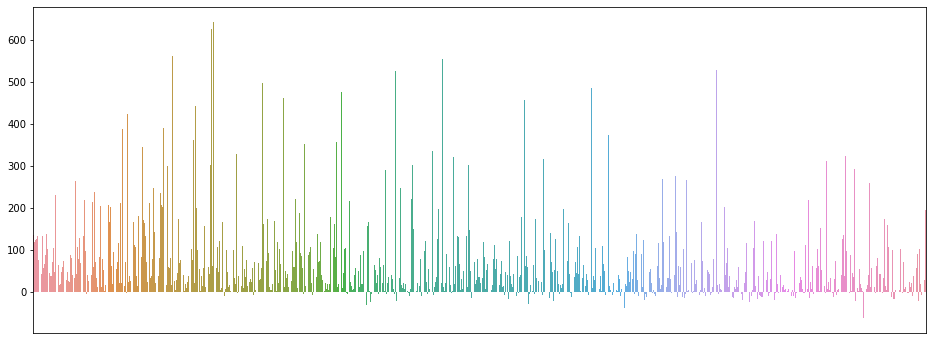

In [168]:
# 계산 결과 시각화 => 프로덕션별로 계산된 결과가 의미있는 차이를 보이고 있음
plt.figure(figsize=(16,6))
sns.barplot(x=list(production_score.keys()), y=list(production_score.values()))
plt.xticks([])
plt.show()

#### 각 영화에 대한 프로덕션 종합점수를 반영한 컬럼 생성 => "prod_score_total" 컬럼

In [169]:
alldata2["prod_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata2))]
prod_list = [v[0] for v in production_count_list]

for i, v in alldata2.iterrows():
    for prod in ast.literal_eval(v["production_name"]):
        if prod not in prod_list:
            tmp[i].append(0)
            continue
        tmp[i].append(production_score[prod])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata2["prod_score_total"] = tmp
alldata2["prod_score_total"] = alldata2["prod_score_total"].fillna(0)
alldata2.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total,prod_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000,56.33286
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500,16.83200
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000,2.41600


In [170]:
alldata2.corr()['profit'].sort_values()  # prod_score_total 상관관계가 약 0.68로 높게 확인됨

original_language_le   -0.07802
id                      0.00540
release_month           0.02651
release_year            0.09074
runtime                 0.19938
vote_average            0.23218
genre_score_total       0.39964
popularity              0.41675
budget                  0.62635
prod_score_total        0.67851
vote_count              0.76812
revenue                 0.98119
profit                  1.00000
video                       NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [171]:
# train, test 분리 => 기존과 동일하게 분리
train3 = alldata2[:len(train2)]
test3 = alldata2[len(train2):]

# 학습데이터 컬럼 3차 설정 => "prod_score_total" 컬럼 추가
col_v3 = ['original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total']

X_train3 = train3[col_v3]
y_train3 = train3['profit']

X_test3 = test3[col_v3]
y_test3 = test3['profit']

In [172]:
X_train3.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286
1,6,30000000.00000,97.00000,98.36500,16.83200
2,6,6000000.00000,104.00000,53.02000,2.41600
3,6,58000000.00000,114.00000,51.95333,51.20500
4,6,12000000.00000,93.00000,67.25000,60.07333


In [173]:
rf = RandomForestRegressor()

rf.fit(X_train3, y_train3)

pred_tr = rf.predict(X_train3)
pred_test = rf.predict(X_test3)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train3, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test3, pred_test)))

Train Data RMSE : 36.684732663963295
Test Data RMSE : 100.42448623661382


> 이번에도 2차 모델링에 비해 성능이 개선된 것으로 확인됨. 특히 Test 데이터에 대한 성능이 많이 향상되었음<br/>
> * Train 데이터 : (1차)57.7 -> (2차)43.3 -> (3차) 36.7<br/>
> * Test 데이터 : (1차)138.1 -> (2차)125.7 -> (3차)100.4

#### "profit" 지표에 log 적용 후 학습한 결과 성능 테스트

In [174]:
profit_min = y_train3.min()
profit_min  # min값 확인

-119.180039

In [175]:
rf.fit(X_train3, np.log1p(y_train3 - profit_min))  # 양수값 기준 log 적용("- profit_min")

pred_tr = np.exp(rf.predict(X_train3)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")
pred_test = np.exp(rf.predict(X_test3)) + profit_min  # 예측결과에 exp 적용 후 보정값 반영("+ profit_min")

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train3, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test3, pred_test)))

Train Data RMSE : 44.006511118897556
Test Data RMSE : 99.6489633834584


> 마찬가지로 이번에도 log 적용에 따른 성능 향상 효과는 나타나지 않음 => 3차례의 테스트 결과, 현 데이터상 "profit"에 대한 log 적용은 모델 성능 향상에 크게 영향은 없는 것으로 판단됨

## 피쳐엔지니어링 및 모델링(4차)

### Feature 관련 조치사항
* 현재 컬럼들 기준, StandardScaler 적용
* 현재 컬럼들 중, "profit"과의 상관관계가 상대적으로 낮은 지표 제외 후 성능테스트 진행

### Scaler 적용 후 성능 테스트

In [176]:
# 전체 데이터로 합치기 => "alldata3"
train3 = pd.concat([X_train3, y_train3], axis=1)
test3 = pd.concat([X_test3, y_test3], axis=1)
alldata3 = pd.concat([train3, test3])

In [177]:
alldata3.iloc[:,:-1]

,original_language_le,budget,runtime,genre_score_total,prod_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286
1,6,30000000.00000,97.00000,98.36500,16.83200
2,6,6000000.00000,104.00000,53.02000,2.41600
3,6,58000000.00000,114.00000,51.95333,51.20500
4,6,12000000.00000,93.00000,67.25000,60.07333
...,...,...,...,...,...
3137,6,30000000.00000,132.00000,38.79000,60.17400
3138,6,13500000.00000,129.00000,38.79000,130.51500
3139,6,6500000.00000,99.00000,44.18000,176.41000
3140,6,10000000.00000,117.00000,38.79000,15.91667


In [178]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler

ss = StandardScaler()
# mms = MinMaxScaler()
# rs = RobustScaler()

In [179]:
alldata3_ss = ss.fit_transform(alldata3.iloc[:,:-1])
alldata3_ss = pd.DataFrame(alldata3_ss, columns=alldata3.iloc[:,:-1].columns)
alldata3_ss = pd.concat([alldata3_ss, alldata3['profit']], axis=1)
alldata3_ss

,original_language_le,budget,runtime,genre_score_total,prod_score_total,profit
0,-0.25846,0.22186,0.27627,0.21098,-0.13228,72.91511
1,-0.25846,-0.21571,-0.65695,0.59672,-0.63471,-14.99201
2,-0.25846,-0.74080,-0.29403,-0.60668,-0.81808,0.67071
3,-0.25846,0.39689,0.22443,-0.63499,-0.19750,-16.70051
4,-0.25846,-0.60953,-0.86433,-0.22904,-0.08470,19.15544
...,...,...,...,...,...,...
3137,-0.25846,-0.21571,1.15765,-0.98433,-0.08342,186.76365
3138,-0.25846,-0.57671,1.00211,-0.98433,0.81129,-13.31233
3139,-0.25846,-0.72986,-0.55326,-0.84129,1.39505,248.77381
3140,-0.25846,-0.65329,0.37996,-0.98433,-0.64635,-9.96972


#### 학습 및 성능 측정

In [180]:
# train, test 분리 => 기존과 동일하게 분리
train4 = alldata3_ss[:len(train3)]
test4 = alldata3_ss[len(train3):]

# 학습데이터 컬럼 4-1차 설정 => 3차와 동일함
col_v4 = ['original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total']

X_train4 = train4[col_v4]
y_train4 = train4['profit']

X_test4 = test4[col_v4]
y_test4 = test4['profit']

In [181]:
X_train4.head()  # X_train 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total
0,-0.25846,0.22186,0.27627,0.21098,-0.13228
1,-0.25846,-0.21571,-0.65695,0.59672,-0.63471
2,-0.25846,-0.74080,-0.29403,-0.60668,-0.81808
3,-0.25846,0.39689,0.22443,-0.63499,-0.19750
4,-0.25846,-0.60953,-0.86433,-0.22904,-0.08470


In [183]:
rf = RandomForestRegressor()

rf.fit(X_train4, y_train4)

pred_tr = rf.predict(X_train4)
pred_test = rf.predict(X_test4)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train4, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test4, pred_test)))

Train Data RMSE : 36.93803872315183
Test Data RMSE : 100.66317670447067


> 스케일링에 따른 특별한 성능향상은 현 데이터를 기준으로는 관찰되지 않음

### "profit"과의 상관관계가 상대적으로 낮은 지표 제외 후 성능 테스트

In [184]:
# 전체 데이터 => "alldata3"
alldata3 = alldata2.copy()

In [185]:
alldata3.corr()['profit'].sort_values()

original_language_le   -0.07802
id                      0.00540
release_month           0.02651
release_year            0.09074
runtime                 0.19938
vote_average            0.23218
genre_score_total       0.39964
popularity              0.41675
budget                  0.62635
prod_score_total        0.67851
vote_count              0.76812
revenue                 0.98119
profit                  1.00000
video                       NaN
Name: profit, dtype: float64

> 기존 선택한 컬럼들 중, "original_language_le"은 상관관계가 낮은 것으로 나타나 제외 후 테스트 진행해보고자 함

In [186]:
# train, test 분리 => 기존과 동일하게 분리
train4 = alldata3[:len(train3)]
test4 = alldata3[len(train3):]

# 학습데이터 컬럼 4-2차 설정 => "original_language_le" 컬럼 제외
col_v4 = ['budget', 'runtime', 'genre_score_total', 'prod_score_total']

X_train4 = train4[col_v4]
y_train4 = train4['profit']

X_test4 = test4[col_v4]
y_test4 = test4['profit']

In [187]:
X_train4.head()  # X_train 현황

,budget,runtime,genre_score_total,prod_score_total
0,50000000.00000,115.00000,83.83000,56.33286
1,30000000.00000,97.00000,98.36500,16.83200
2,6000000.00000,104.00000,53.02000,2.41600
3,58000000.00000,114.00000,51.95333,51.20500
4,12000000.00000,93.00000,67.25000,60.07333


In [194]:
rf = RandomForestRegressor()

rf.fit(X_train4, y_train4)

pred_tr = rf.predict(X_train4)
pred_test = rf.predict(X_test4)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train4, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test4, pred_test)))

Train Data RMSE : 36.77315656844643
Test Data RMSE : 100.30116405240685


> "original_language_le" 제외 시 성능에 대한 유의미한 차이는 현 데이터 기준으로 특별히 관찰되지는 않음

## 피쳐엔지니어링 및 모델링(5차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "prod_countries_name" 컬럼에서 국가별 점수 산출 및 해당 영화에 대한 국가별 종합점수를 계산한 컬럼 추가

In [195]:
# 전체 데이터 => "alldata4"
alldata4 = alldata2.copy()

In [196]:
# 프로덕션 국가 종류 확인 => 총 68개의 프로덕션 국가가 존재함
prod_countries_total = alldata4['prod_countries_name'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
prod_countries_count = {}

for v in prod_countries_total:
    for prod_countries in v:
        if prod_countries_count.get(prod_countries) == None:
            prod_countries_count[prod_countries] = 1
        else:
            prod_countries_count[prod_countries] += 1

len(prod_countries_count)

68

In [197]:
# 프로덕션 국가 컬럼을 반영한 데이터프레임 생성
prod_countries_df = alldata4[['prod_countries_name', 'profit']]

for i, v in prod_countries_df.iterrows():
    for production in ast.literal_eval(v['prod_countries_name']):
        prod_countries_df.loc[i, production] = 1  # 해당 국가의 컬럼에 1을 입력

prod_countries_df.head()

,prod_countries_name,profit,United States of America,Germany,United Kingdom,India,Ireland,China,France,Hong Kong,Taiwan,Canada,Australia,South Africa,Denmark,Spain,Japan,Israel,Italy,New Zealand,Belgium,Czech Republic,Switzerland,Mexico,Russia,...,Turkey,Thailand,Brazil,Norway,Lithuania,Iceland,Indonesia,Colombia,Venezuela,Serbia,Cambodia,Mali,Uruguay,Paraguay,Slovenia,Kazakhstan,Pakistan,Puerto Rico,Portugal,Qatar,Tunisia,Singapore,Iran,Serbia and Montenegro,Angola
0,['United States of America'],72.91511,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Germany', 'United States of America']",-14.99201,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['United States of America'],0.67071,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['Germany', 'United States of America']",-16.70051,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,['United States of America'],19.15544,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# 프로덕션 국가별 점수 산출 => 각 국가의 영화 "profit" 평균을 계산해 프로덕션별 점수로 반영
prod_countries_score = {}
for prod_countries in prod_countries_count.keys():
    score = prod_countries_df[prod_countries_df[prod_countries] == 1]["profit"].mean()
    prod_countries_score[prod_countries] = round(score, 2)

len(prod_countries_score)

68

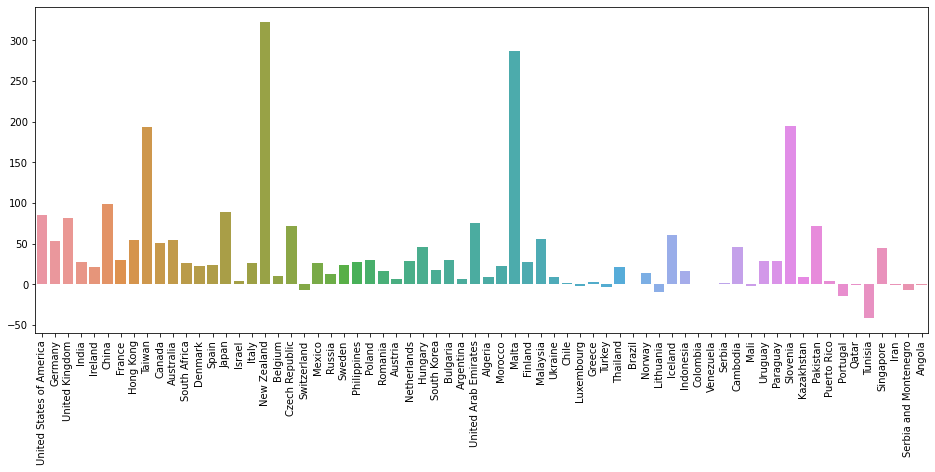

In [199]:
# 계산 결과 시각화 => 프로덕션 국가별로 계산된 결과 또한 의미있는 차이를 보이고 있음
plt.figure(figsize=(16,6))
sns.barplot(x=list(prod_countries_score.keys()), y=list(prod_countries_score.values()))
plt.xticks(rotation=90)
plt.show()

#### 각 영화에 대한 프로덕션 국가별 종합점수를 반영한 컬럼 생성 => "prod_countries_score_total" 컬럼

In [200]:
alldata4["prod_countries_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata4))]

for i, v in alldata4.iterrows():
    for prod_countries in ast.literal_eval(v["prod_countries_name"]):
        tmp[i].append(prod_countries_score[prod_countries])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata4["prod_countries_score_total"] = tmp
alldata4["prod_countries_score_total"] = alldata4["prod_countries_score_total"].fillna(0)
alldata4.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total,prod_score_total,prod_countries_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000,56.33286,85.35000
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500,16.83200,69.07000
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000,2.41600,85.35000


In [201]:
alldata4.corr()['profit'].sort_values()  # prod_countries_score_total 상관관계가 약 0.22로 다소 낮게 확인됨

original_language_le         -0.07802
id                            0.00540
release_month                 0.02651
release_year                  0.09074
runtime                       0.19938
prod_countries_score_total    0.21972
vote_average                  0.23218
genre_score_total             0.39964
popularity                    0.41675
budget                        0.62635
prod_score_total              0.67851
vote_count                    0.76812
revenue                       0.98119
profit                        1.00000
video                             NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [202]:
# train, test 분리 => 기존과 동일하게 분리
train5 = alldata4[:len(train3)]
test5 = alldata4[len(train3):]

# 학습데이터 컬럼 5차 설정 => "prod_countries_score_total" 컬럼 추가
col_v5 = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total'
]

X_train5 = train5[col_v5]
y_train5 = train5['profit']

X_test5 = test5[col_v5]
y_test5 = test5['profit']

In [203]:
X_train5.shape, X_test5.shape, y_train5.shape, y_test.shape  # shape 현황 확인

((2513, 6), (629, 6), (2513,), (629,))

In [204]:
X_train5.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000


In [211]:
rf = RandomForestRegressor()

rf.fit(X_train5, y_train5)

pred_tr = rf.predict(X_train5)
pred_test = rf.predict(X_test5)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train5, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test5, pred_test)))

Train Data RMSE : 37.05608063036668
Test Data RMSE : 99.83429386977869


> "prod_countries_score_total" 컬럼은 성능 향상에 크게 영향을 미치지 못하는 것으로 판단됨

## 피쳐엔지니어링 및 모델링(6차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "budget_grade" 컬럼 추가
    - 서로 다른 각각의 금액들로 이루어진 "budget" 컬럼의 숫자를 그룹화 해 등급을 선정한 컬럼 생성

In [214]:
# 전체 데이터 => "alldata5"
alldata5 = alldata4.copy()

#### budget 금액 구간 나누기

In [238]:
range_list = list(np.linspace(alldata5['budget'].min(), alldata5['budget'].max()+1, 11))  # 10개 구간 기준 생성
range_label = [n for n in range(11)]  # 구간별 라벨 생성

# 구간 나누기
alldata5['budget_grade'] = pd.cut(alldata5['budget'], range_list, labels=range_label[:-1],
                                  right=False)  # 구간 기준에서 오른쪽 숫자는 미포함

alldata5['budget_grade'] = alldata5['budget_grade'].astype(int)
alldata5['budget_grade'].head()

0    1
1    1
2    0
3    2
4    0
Name: budget_grade, dtype: int64

In [240]:
alldata5['budget_grade'].value_counts()  # 구간별 개수 확인 => budget 규모에 따른 개수 차이가 존재함

0    1752
1     653
2     315
3     162
4      93
5      77
6      40
7      29
8      15
9       6
Name: budget_grade, dtype: int64

In [241]:
alldata5.corr()['profit'].sort_values()  # budget_grade 상관관계가 약 0.62로 확인됨

original_language_le         -0.07802
id                            0.00540
release_month                 0.02651
release_year                  0.09074
runtime                       0.19938
prod_countries_score_total    0.21972
vote_average                  0.23218
genre_score_total             0.39964
popularity                    0.41675
budget_grade                  0.62222
budget                        0.62635
prod_score_total              0.67851
vote_count                    0.76812
revenue                       0.98119
profit                        1.00000
video                             NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [258]:
# train, test 분리 => 기존과 동일하게 분리
train6 = alldata5[:len(train5)]
test6 = alldata5[len(train5):]

# 학습데이터 컬럼 6차 설정 => "budget_grade" 컬럼 추가
col_v6 = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total', 'budget_grade'
]

X_train6 = train6[col_v6]
y_train6 = train6['profit']

X_test6 = test6[col_v6]
y_test6 = test6['profit']

X_train6.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0


In [260]:
rf = RandomForestRegressor()

rf.fit(X_train6, y_train6)

pred_tr = rf.predict(X_train6)
pred_test = rf.predict(X_test6)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train6, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test6, pred_test)))

Train Data RMSE : 36.927162834635546
Test Data RMSE : 101.21428674867352


In [262]:
# 현재 버전 alldata csv파일 저장
alldata5.to_csv('./data/alldata5.csv')
train6.to_csv('./data/train6.csv')
test6.to_csv('./data/test6.csv')

In [4]:
# 파일 읽어오기
alldata5 = pd.read_csv('./data/alldata5.csv', index_col=0)
train6 = pd.read_csv('./data/train6.csv', index_col=0)
test6 = pd.read_csv('./data/test6.csv', index_col=0)

## 피쳐엔지니어링 및 모델링(7차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "keywords_name" 컬럼에서 키워드별 종합점수를 계산한 컬럼 추가
    - keywords_name 종류가 약 8천개이기 때문에 건수 기준으로 상위 5천개를 추출해 점수 산출함

In [7]:
# 키워드 종류 확인 => 총 7,969개의 키워드 존재함
keywords_total = alldata5['keywords_name'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
keywords_count = {}

for v in keywords_total:
    for keywords in v:
        if keywords_count.get(keywords) == None:
            keywords_count[keywords] = 1
        else:
            keywords_count[keywords] += 1

len(keywords_count)

7969

In [21]:
# 영화 건수 기준 상위 5000개 프로덕션만 추출
keywords_count_list = sorted(keywords_count.items(), key=lambda x:x[1], reverse=True)[:5000]
keywords_count_list[:10]

[('duringcreditsstinger', 288),
 ('woman director', 216),
 ('based on novel', 186),
 ('aftercreditsstinger', 145),
 ('murder', 136),
 ('independent film', 135),
 ('violence', 118),
 ('3d', 102),
 ('biography', 101),
 ('dystopia', 101)]

In [22]:
# 키워드별 컬럼을 반영한 데이터프레임 생성
keywords_df = alldata5[['keywords_name', 'profit']]

for i, v in keywords_df.iterrows():
    for keywords in ast.literal_eval(v['keywords_name']):
        keywords_df.loc[i, keywords] = 1  # 해당 컬럼에 1을 입력

keywords_df.head()

,keywords_name,profit,prison,muslim,ship,mystery,science fiction,escape,crime,prison escape,cia agent,fall,burned alive,violence,diver,swimwear,secret,fetishism,stripper,family secrets,convict,chubby woman,extramarital affair,american football,sports team,...,卧底肥妈,big爆任务,超级妈妈,encounter,tennis player,wimbledon,new york subway,subway tunnel,policy and organisations,money delivery,tattooing,iv,new year's,barbecue,moon landing,precocity,logician,cryptography,compassion,tolerance,boxing trainer,determination,stonewall riot,evil doll,psychiatry
0,"['prison', 'muslim', 'ship', 'mystery', 'scien...",72.91511,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['fall', 'burned alive', 'violence', 'diver', ...",-14.99201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['secret', 'fetishism', 'stripper', 'family se...",0.67071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['american football', 'sports team', 'stadium'...",-16.70051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['carpet', 'pimp', 'harvard university', 'join...",19.15544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 키워드별 점수 산출 => 각각의 "profit" 평균을 계산해 키워드별 점수로 반영
keywords_score = {}
for keywords, count in keywords_count_list:
    score = keywords_df[keywords_df[keywords] == 1]["profit"].mean()
    keywords_score[keywords] = round(score, 2)

len(keywords_score)

5000

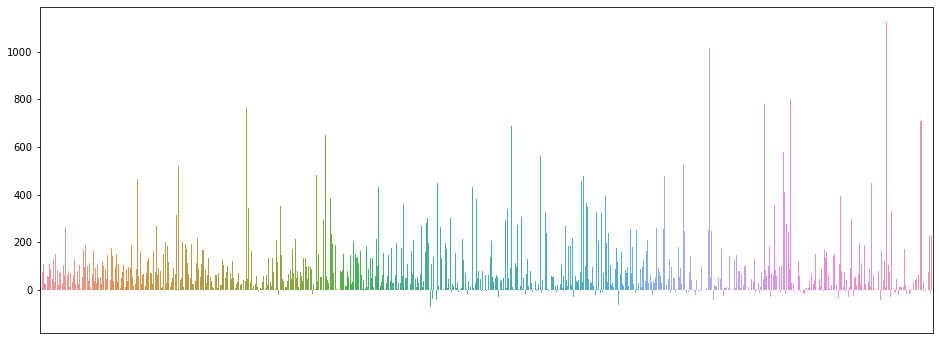

In [24]:
# 계산 결과 시각화 => 서로 의미있는 차이를 보이고 있음
plt.figure(figsize=(16,6))
sns.barplot(x=list(keywords_score.keys()), y=list(keywords_score.values()))
plt.xticks([])
plt.show()

#### 키워드 종합점수를 반영한 컬럼 생성 => "keywords_score_total" 컬럼

In [25]:
alldata5["keywords_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata5))]
keywords_list = [v[0] for v in keywords_count_list]

for i, v in alldata5.iterrows():
    for keywords in ast.literal_eval(v["keywords_name"]):
        if keywords not in keywords_list:
            tmp[i].append(0)
            continue
        tmp[i].append(keywords_score[keywords])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata5["keywords_score_total"] = tmp
alldata5["keywords_score_total"] = alldata5["keywords_score_total"].fillna(0)
alldata5.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,keywords_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000,56.33286,85.35000,1,63.13556
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500,16.83200,69.07000,1,8.38000
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000,2.41600,85.35000,0,31.61857


In [26]:
alldata5.corr()['profit'].sort_values()  # keywords_score_total 상관관계가 약 0.73으로 상다히 높게 확인됨

original_language_le         -0.07802
id                            0.00540
release_month                 0.02651
release_year                  0.09074
runtime                       0.19938
prod_countries_score_total    0.21972
vote_average_grage            0.22316
vote_average                  0.23218
genre_score_total             0.39964
popularity                    0.41675
budget_grade                  0.62222
budget                        0.62635
prod_score_total              0.67851
keywords_score_total          0.73057
vote_count                    0.76812
revenue                       0.98119
profit                        1.00000
video                             NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [27]:
# train, test 분리 => 기존과 동일하게 분리
train7 = alldata5[:len(train6)]
test7 = alldata5[len(train6):]

# 학습데이터 컬럼 7차 설정 => "budget_grade" 컬럼 추가
col_v7 = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total', 'budget_grade', 'keywords_score_total'
]

X_train7 = train7[col_v7]
y_train7 = train7['profit']

X_test7 = test7[col_v7]
y_test7 = test7['profit']

X_train7.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,keywords_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1,63.13556
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1,8.38000
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0,31.61857
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2,68.86909
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0,26.94560


In [38]:
rf = RandomForestRegressor()

rf.fit(X_train7, y_train7)

pred_tr = rf.predict(X_train7)
pred_test = rf.predict(X_test7)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train7, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test7, pred_test)))

Train Data RMSE : 31.98911140640466
Test Data RMSE : 93.2061634192424


## 피쳐엔지니어링 및 모델링(8차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "cast_name" 컬럼에서 출연자별 종합점수를 계산한 컬럼 추가
    - 출연자가 전체 4만3천명을 넘기 때문에 영화 출연건수를 기준으로 상위 3만명의 정보만 추출해 점수 산출함

In [39]:
# 전체 데이터 => "alldata7"
alldata7 = alldata5.copy()

In [40]:
# 출연자 정보 확인 => 총 43,736명의 출연자 정보가 존재함
cast_name_total = alldata7['cast_name'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
cast_name_count = {}

for v in cast_name_total:
    for cast_name in v:
        if cast_name_count.get(cast_name) == None:
            cast_name_count[cast_name] = 1
        else:
            cast_name_count[cast_name] += 1

len(cast_name_count)

43736

In [60]:
# 영화 건수 기준 상위 30,000명 출연자 정보만 추출
cast_name_count_list = sorted(cast_name_count.items(), key=lambda x:x[1], reverse=True)[:30000]
cast_name_count_list[:20]

[('Samuel L. Jackson', 45),
 ('Matt Damon', 41),
 ('Morgan Freeman', 41),
 ('J.K. Simmons', 39),
 ('Bruce Willis', 37),
 ('Liam Neeson', 37),
 ('James Franco', 36),
 ('Owen Wilson', 35),
 ('John Goodman', 35),
 ('Stanley Tucci', 35),
 ('Robert De Niro', 34),
 ('Nicolas Cage', 32),
 ('Paul Giamatti', 31),
 ('Ben Kingsley', 31),
 ('Seth Rogen', 31),
 ('Justin Long', 31),
 ('Colin Farrell', 30),
 ('Elizabeth Banks', 30),
 ('Bill Nighy', 30),
 ('Bill Hader', 30)]

In [61]:
# 출연자별 컬럼을 반영한 데이터프레임 생성
cast_name_df = alldata7[['cast_name', 'profit']]

for i, v in cast_name_df.iterrows():
    for cast_name in ast.literal_eval(v['cast_name']):
        cast_name_df.loc[i, cast_name] = 1  # 해당 컬럼에 1을 입력

cast_name_df.head()

,cast_name,profit,Sylvester Stallone,Arnold Schwarzenegger,Jim Caviezel,Vinnie Jones,50 Cent,Vincent D'Onofrio,Matt Gerald,Sam Neill,Christian Stokes,Lydia Hull,David Joseph Martinez,Caitriona Balfe,Amy Ryan,Faran Tahir,Steven Krueger,Jaylen Moore,James Rawlings,Alec Rayme,David Leitch,Jeff Chase,Brian Oerly,Christopher Matthew Cook,Michael Papajohn,...,Alexandre Nachi,Atticus Mitchell,Joanne Vannicola,Wilson Gonzalez Ochsenknecht,Ivar Brogger,Michelle Romano,Paige Diaz,Tree O'Toole,Trampas Thompson,Camden Singer,Keira Daniels,Christopher Shaw,Geoff Wehner,Sasha Sheldon,A Martinez,Julie Sifuentes Etheridge,Lily Gladstone,Nev Scharrel,Adrian Ciscato,Katia Saponenko,Jude Alpers,Cory Walls,Sophie M. Siadatpour,Stephanie De Meautis,Bruno Dequier
0,"['Sylvester Stallone', 'Arnold Schwarzenegger'...",72.91511,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...",-14.99201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Andy García', 'Julianna Margulies', 'Steven ...",0.67071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['George Clooney', 'Renée Zellweger', 'John Kr...",-16.70051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['Method Man', 'Redman', 'Obba Babatundé', 'Mi...",19.15544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# 출연자별 점수 산출 => 각각의 "profit" 평균을 계산해 점수로 반영
cast_name_score = {}
for cast_name, count in cast_name_count_list:
    score = cast_name_df[cast_name_df[cast_name] == 1]["profit"].mean()
    cast_name_score[cast_name] = round(score, 2)

len(cast_name_score)

30000

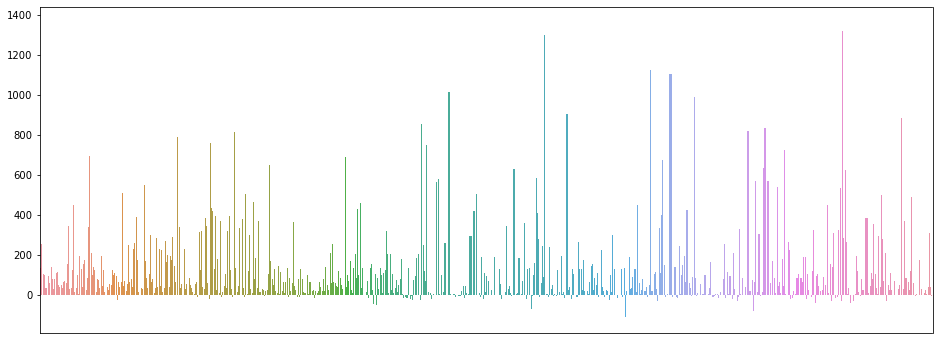

In [63]:
# 계산 결과 시각화 => 계산된 결과가 의미있는 차이를 보이고 있음
plt.figure(figsize=(16,6))
sns.barplot(x=list(cast_name_score.keys()), y=list(cast_name_score.values()))
plt.xticks([])
plt.show()

#### 각 영화에 대한 출연자 종합점수를 반영한 컬럼 생성 => "cast_name_score_total" 컬럼

In [64]:
alldata7["cast_name_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata7))]
cast_name_list = [v[0] for v in cast_name_count_list]

for i, v in alldata7.iterrows():
    for cast_name in ast.literal_eval(v["cast_name"]):
        if cast_name not in cast_name_list:
            tmp[i].append(0)
            continue
        tmp[i].append(cast_name_score[cast_name])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata7["cast_name_score_total"] = tmp
alldata7["cast_name_score_total"] = alldata7["cast_name_score_total"].fillna(0)
alldata7.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,keywords_score_total,cast_name_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000,56.33286,85.35000,1,63.13556,80.86833
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500,16.83200,69.07000,1,8.38000,23.95533
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000,2.41600,85.35000,0,31.61857,69.29364


In [65]:
alldata7.corr()['profit'].sort_values()  # cast_name_score_total 상관관계가 약 0.86으로 매우 높게 확인됨

original_language_le         -0.07802
id                            0.00540
release_month                 0.02651
release_year                  0.09074
runtime                       0.19938
prod_countries_score_total    0.21972
vote_average_grage            0.22316
vote_average                  0.23218
genre_score_total             0.39964
popularity                    0.41675
budget_grade                  0.62222
budget                        0.62635
prod_score_total              0.67851
keywords_score_total          0.73057
vote_count                    0.76812
cast_name_score_total         0.86317
revenue                       0.98119
profit                        1.00000
video                             NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [66]:
# train, test 분리 => 기존과 동일하게 분리
train8 = alldata7[:len(train7)]
test8 = alldata7[len(train7):]

# 학습데이터 컬럼 8차 설정 => "cast_name_score_total" 컬럼 추가
col_v8 = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total', 'budget_grade', 'cast_name_score_total'
]

X_train8 = train8[col_v8]
y_train8 = train8['profit']

X_test8 = test8[col_v8]
y_test8 = test8['profit']

X_train8.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,cast_name_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1,80.86833
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1,23.95533
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0,69.29364
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2,86.33071
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0,43.86100


In [76]:
rf = RandomForestRegressor()

rf.fit(X_train8, y_train8)

pred_tr = rf.predict(X_train8)
pred_test = rf.predict(X_test8)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train8, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test8, pred_test)))

Train Data RMSE : 22.649729488452117
Test Data RMSE : 90.81912316633164


## 피쳐엔지니어링 및 모델링(9차)

### Feature 관련 조치사항
* 추가 반영할 Feature별 세부검토
* "crew_main" 컬럼에서 crew별 종합점수를 계산한 컬럼 추가
    - 주요 crew가 약 6.3천명 정도이며 영화건수를 기준으로 상위 5천명의 crew 정보만 추출해 점수 산출함

In [77]:
# 전체 데이터 => "alldata8"
alldata8 = alldata7.copy()

In [81]:
# 주요 crew 정보 확인 => 총 6,325명의 crew 정보가 존재함
crew_main_total = alldata8['crew_main'].apply(ast.literal_eval)  # 전체 데이터 기준 문자열 evaluate 적용
crew_main_count = {}

for v in crew_main_total:
    for crew_main in v:
        if crew_main_count.get(crew_main[2]) == None:
            crew_main_count[crew_main[2]] = 1
        else:
            crew_main_count[crew_main[2]] += 1

len(crew_main_count)

6325

In [97]:
# 영화 건수 기준 상위 5천명 crew 정보만 추출
crew_main_count_list = sorted(crew_main_count.items(), key=lambda x:x[1], reverse=True)[:5000]
crew_main_count_list[:20]

[('Avy Kaufman', 59),
 ('Luc Besson', 55),
 ('Deborah Aquila', 49),
 ('Mary Vernieu', 49),
 ('Hans Zimmer', 44),
 ('Francine Maisler', 43),
 ('Steven Soderbergh', 42),
 ('James Newton Howard', 41),
 ('Robert Rodriguez', 40),
 ('Steven Spielberg', 36),
 ('Bob Weinstein', 36),
 ('Bruce Berman', 36),
 ('Denise Chamian', 34),
 ('John Debney', 34),
 ('Harvey Weinstein', 33),
 ('Scott Rudin', 32),
 ('Sarah Finn', 32),
 ('Tim Bevan', 32),
 ('Ridley Scott', 31),
 ('Danny Elfman', 31)]

In [98]:
# crew 정보를 반영한 데이터프레임 생성
crew_main_df = alldata8[['crew_main', 'profit']]

for i, v in crew_main_df.iterrows():
    for crew_main in ast.literal_eval(v['crew_main']):
        crew_main_df.loc[i, crew_main[2]] = 1  # 해당 컬럼에 1을 입력

crew_main_df.head()

,crew_main,profit,David Lazan,Paul Hughen,Ellen Heuer,Anne McCarthy,Barry Chusid,Tom Rosenberg,Reinhold Heil,Brian Berdan,James McQuaide,Wendy Partridge,Andy García,Sheila Jaffe,Jan A.P. Kaczmarek,Michael Roban,Vanja Cernjul,George Clooney,Stephen Mirrione,Sydney Pollack,Randy Newman,Danny DeVito,Matthew Barry,Michael Shamberg,Stacey Sher,...,Kwon Yoo-jin,Jinju Kim,Jeonghui Im,Tom McCullagh,Luke Scott,Seth W. Owen,Laura Jennings,Juliette Ménager,Gaspard Augé,Quentin Dupieux,David Mamet,Catherine Schroer,Israel Horovitz,Mark Orton,Nitsa Benchetrit,Stefania Cella,Jon Robin Baitz,Markus Förderer,Lorette Leblanc,Lia Roldan,Tom Elkins,Arnaud Desplechin,Pierre Coffin,Jill Ambrosino,John R.A. Benson
0,"[[8221, 'Art Direction', 'David Lazan'], [9347...",72.91511,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",-14.99201,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",0.67071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[[1461, 'Director', 'George Clooney'], [1461, ...",-16.70051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[[518, 'Producer', 'Danny DeVito'], [545, 'Cas...",19.15544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# 주요 crew별 점수 산출 => 각 "profit" 평균을 계산해 crew별 점수로 반영
crew_main_score = {}
for crew_main, count in crew_main_count_list:
    score = crew_main_df[crew_main_df[crew_main] == 1]["profit"].mean()
    crew_main_score[crew_main] = round(score, 2)

len(crew_main_score)

5000

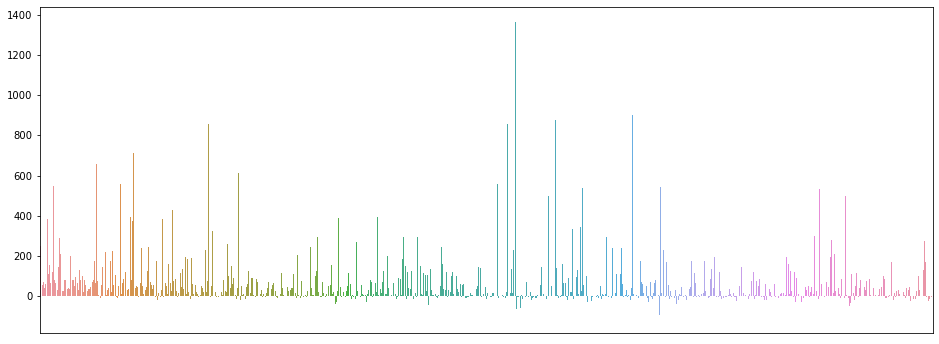

In [100]:
# 계산 결과 시각화 => crew별로 의미있는 차이를 보이고 있음
plt.figure(figsize=(16,6))
sns.barplot(x=list(crew_main_score.keys()), y=list(crew_main_score.values()))
plt.xticks([])
plt.show()

#### 각 영화에 대한 프로덕션 종합점수를 반영한 컬럼 생성 => "crew_main_score_total" 컬럼

In [101]:
alldata8["crew_main_score_total"] = 0  # 0으로 초기화

tmp = [[] for _ in range(len(alldata8))]
crew_main_list = [v[0] for v in crew_main_count_list]

for i, v in alldata8.iterrows():
    for crew_main in ast.literal_eval(v["crew_main"]):
        if crew_main[2] not in crew_main_list:
            tmp[i].append(0)
            continue
        tmp[i].append(crew_main_score[crew_main[2]])
    tmp[i] = np.mean(tmp[i])  # 종합 평균점수 계산

alldata8["crew_main_score_total"] = tmp
alldata8["crew_main_score_total"] = alldata8["crew_main_score_total"].fillna(0)
alldata8.head(3)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,vote_average_grage,original_language_le,profit,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,keywords_score_total,cast_name_score_total,crew_main_score_total
0,107846,Escape Plan,"[28, 53]","['Action', 'Thriller']",en,"['en', 'de', 'ar', 'ur']","['English', 'Deutsch', 'العربية', 'اردو']",14.19161,"[491, 2995, 10405, 11761, 31832, 36212, 46961]","['Summit Entertainment', 'Atmosphere Entertain...",['US'],['United States of America'],2013,10,50000000.00000,122915111.00000,115.00000,Released,False,6.70000,1688.00000,"[378, 789, 3799, 10092, 10568, 10685, 14536, 1...","['prison', 'muslim', 'ship', 'mystery', 'scien...","[16483, 1100, 8767, 980, 62644, 7132, 98215, 4...","['Sylvester Stallone', 'Arnold Schwarzenegger'...","[[8221, 'Art Direction', 'David Lazan'], [9347...",6,6,72.91511,83.83000,56.33286,85.35000,1,63.13556,80.86833,85.86000
1,9042,The Cave,"[28, 12, 27, 53]","['Action', 'Adventure', 'Horror', 'Thriller']",en,"['cs', 'en']","['Český', 'English']",8.07725,"[126, 995, 3287, 26032, 26033]","['Lakeshore Entertainment', 'Cinerenta Medienb...","['DE', 'US']","['Germany', 'United States of America']",2005,8,30000000.00000,15007991.00000,97.00000,Released,False,5.20000,204.00000,"[6201, 9786, 14819, 33782, 156125]","['fall', 'burned alive', 'violence', 'diver', ...","[6614, 55541, 9779, 17286, 15555, 65730, 18307...","['Cole Hauser', 'Eddie Cibrian', 'Моррис Честн...","[[68602, 'Producer', 'Tom Rosenberg'], [1076, ...",5,6,-14.99201,98.36500,16.83200,69.07000,1,8.38000,23.95533,21.16400
2,28053,City Island,"[18, 35]","['Drama', 'Comedy']",en,['en'],['English'],7.01604,"[11093, 16647, 61416, 61417, 61418]","['Lucky Monkey Pictures', 'CineSon Entertainme...",['US'],['United States of America'],2009,3,6000000.00000,6670712.00000,104.00000,Released,False,6.90000,114.00000,"[1328, 2843, 6593, 6625, 15234, 34029, 34094]","['secret', 'fetishism', 'stripper', 'family se...","[1271, 25654, 54815, 58635, 132157, 1903, 1246...","['Andy García', 'Julianna Margulies', 'Steven ...","[[1271, 'Producer', 'Andy García'], [7494, 'Ca...",6,6,0.67071,53.02000,2.41600,85.35000,0,31.61857,69.29364,15.78400


In [102]:
alldata8.corr()['profit'].sort_values()  # crew_main_score_total 상관관계가 약 0.83으로 상당히 높게 확인됨

original_language_le         -0.07802
id                            0.00540
release_month                 0.02651
release_year                  0.09074
runtime                       0.19938
prod_countries_score_total    0.21972
vote_average_grage            0.22316
vote_average                  0.23218
genre_score_total             0.39964
popularity                    0.41675
budget_grade                  0.62222
budget                        0.62635
prod_score_total              0.67851
keywords_score_total          0.73057
vote_count                    0.76812
crew_main_score_total         0.83078
cast_name_score_total         0.86317
revenue                       0.98119
profit                        1.00000
video                             NaN
Name: profit, dtype: float64

#### 학습 및 성능 측정

In [103]:
# train, test 분리 => 기존과 동일하게 분리
train9 = alldata8[:len(train8)]
test9 = alldata8[len(train8):]

# 학습데이터 컬럼 9차 설정 => "crew_main_score_total" 컬럼 추가
col_v9 = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total', 'budget_grade', 'cast_name_score_total', 'crew_main_score_total'
]

X_train9 = train9[col_v9]
y_train9 = train9['profit']

X_test9 = test9[col_v9]
y_test9 = test9['profit']

X_train9.head()  # 현재 기준 X_train 컬럼 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,cast_name_score_total,crew_main_score_total
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1,80.86833,85.86000
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1,23.95533,21.16400
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0,69.29364,15.78400
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2,86.33071,84.05200
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0,43.86100,51.06400


In [151]:
rf = RandomForestRegressor()

rf.fit(X_train9, y_train9)

pred_tr = rf.predict(X_train9)
pred_test = rf.predict(X_test9)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train9, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test9, pred_test)))

Train Data RMSE : 20.874712451982678
Test Data RMSE : 88.7392198938546


In [152]:
# 현재 버전 alldata csv파일 저장
alldata8.to_csv('./data/alldata8.csv')
train9.to_csv('./data/train9.csv')
test9.to_csv('./data/test9.csv')

In [4]:
# 파일 읽어오기
alldata8 = pd.read_csv('./data/alldata8.csv', index_col=0)
train9 = pd.read_csv('./data/train9.csv', index_col=0)
test9 = pd.read_csv('./data/test9.csv', index_col=0)

## 피쳐엔지니어링 및 모델링(10차)

### 현재까지 정리된 9개 Feature를 기준으로 추가 검토 진행
* 현재까지 정리된 9개 Feature
    - 'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
      'prod_countries_score_total', 'budget_grade', 'cast_name_score_total', 'crew_main_score_total'

### 추가 검토사항
* 9개 Feature들간의 관계를 통해 신규 Feature 생성 검토
* 각 Feature의 분포 현황 등 추가 검토

In [5]:
# "profit" 포함한 총 10개 컬럼 정보 저장
col_list = [
    'original_language_le', 'budget', 'runtime', 'genre_score_total', 'prod_score_total',
    'prod_countries_score_total', 'budget_grade', 'cast_name_score_total', 'crew_main_score_total', 'profit'
]

alldata8[col_list].head()

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,cast_name_score_total,crew_main_score_total,profit
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1,80.86833,85.86000,72.91511
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1,23.95533,21.16400,-14.99201
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0,69.29364,15.78400,0.67071
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2,86.33071,84.05200,-16.70051
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0,43.86100,51.06400,19.15544


In [6]:
# 10개 컬럼 기준 train, test 데이터 저장 => 기존과 동일 기준 train, test 분리
train_v1 = alldata8[col_list][:len(train9)]
test_v1 = alldata8[col_list][len(train9):]

train_v1.shape, test_v1.shape

((2513, 10), (629, 10))

In [7]:
train_v1  # train 데이터 현황

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,cast_name_score_total,crew_main_score_total,profit
0,6,50000000.00000,115.00000,83.83000,56.33286,85.35000,1,80.86833,85.86000,72.91511
1,6,30000000.00000,97.00000,98.36500,16.83200,69.07000,1,23.95533,21.16400,-14.99201
2,6,6000000.00000,104.00000,53.02000,2.41600,85.35000,0,69.29364,15.78400,0.67071
3,6,58000000.00000,114.00000,51.95333,51.20500,69.07000,2,86.33071,84.05200,-16.70051
4,6,12000000.00000,93.00000,67.25000,60.07333,85.35000,0,43.86100,51.06400,19.15544
...,...,...,...,...,...,...,...,...,...,...
2508,6,58000000.00000,103.00000,76.16333,101.72500,85.35000,2,69.00600,129.09400,42.54181
2509,6,110000000.00000,128.00000,83.83000,116.06800,83.17000,3,134.83826,84.15000,273.53146
2510,6,51500000.00000,100.00000,52.58000,10.26333,72.34667,1,71.74789,65.73600,3.61236
2511,6,25000000.00000,97.00000,58.53500,72.90250,85.35000,0,61.55727,47.04800,45.44294


In [8]:
train_v1.corr()['profit'].sort_values()  # 현재 기준 상관관계

original_language_le         -0.08052
runtime                       0.19652
prod_countries_score_total    0.20933
genre_score_total             0.40408
budget_grade                  0.61658
budget                        0.61967
prod_score_total              0.67922
crew_main_score_total         0.85385
cast_name_score_total         0.89401
profit                        1.00000
Name: profit, dtype: float64

### 프로덕션, 출연자, crew 점수의 합을 계산한 신규컬럼 "total_score" 생성 및 모델 성능 테스트

In [9]:
# "total_score" 신규컬럼 생성
train_v1['total_score'] = (train_v1['prod_score_total'] + train_v1['cast_name_score_total'] \
                           + train_v1['crew_main_score_total'])
test_v1['total_score'] = (test_v1['prod_score_total'] + test_v1['cast_name_score_total'] \
                           + test_v1['crew_main_score_total'])

In [10]:
train_v1.corr()['profit'].sort_values()  # "total_score"의 상관관계가 가장 높게 나타남

original_language_le         -0.08052
runtime                       0.19652
prod_countries_score_total    0.20933
genre_score_total             0.40408
budget_grade                  0.61658
budget                        0.61967
prod_score_total              0.67922
crew_main_score_total         0.85385
cast_name_score_total         0.89401
total_score                   0.89605
profit                        1.00000
Name: profit, dtype: float64

In [25]:
# X, y 데이터 셋팅
X_train = train_v1.drop('profit', axis=1)
y_train = train_v1['profit']
X_test = test_v1.drop('profit', axis=1)
y_test = test_v1['profit']


# 학습 및 성능 측정
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred_tr = rf.predict(X_train)
pred_test = rf.predict(X_test)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test, pred_test)))

Train Data RMSE : 20.708250021274374
Test Data RMSE : 88.82553571367797


> 추가한 피쳐의 상관관계는 높게 나타났으나, 테스트 결과 모델 성능에 특별한 향상은 관찰되지 않음

### 각 Feature의 분포 현황 등 추가 검토

In [29]:
train_v1.columns  # 현재 컬럼 현황

Index(['original_language_le', 'budget', 'runtime', 'genre_score_total',
       'prod_score_total', 'prod_countries_score_total', 'budget_grade',
       'cast_name_score_total', 'crew_main_score_total', 'profit',
       'total_score'],
      dtype='object')

In [181]:
# v2 변수로 관리하기 위해 복사
train_v2 = train_v1.copy()
test_v2 = test_v1.copy()

#### budget 컬럼 검토

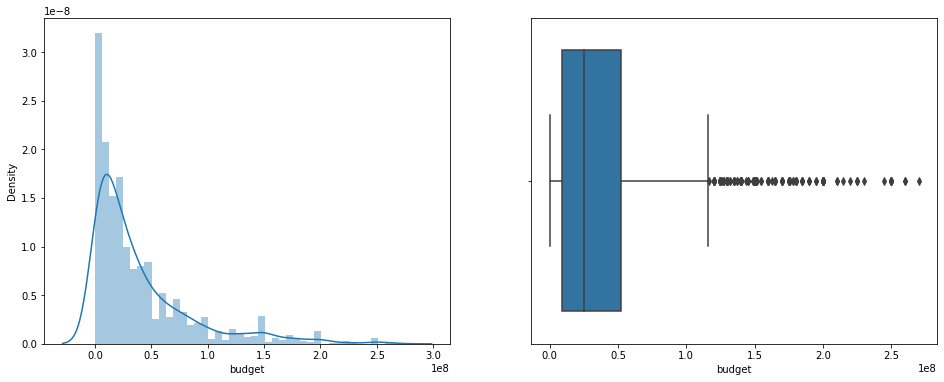

In [182]:
# 분포 현황 확인
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(train_v2['budget'], ax=ax[0])
sns.boxplot(train_v2['budget'], ax=ax[1])
plt.show()

In [183]:
# 'budget' 컬럼값에 log 적용
train_v2['budget'] = np.log(train_v2['budget'])
test_v2['budget'] = np.log(test_v2['budget'])

In [184]:
# X, y 데이터 셋팅
X_train = train_v2.drop('profit', axis=1)
y_train = train_v2['profit']
X_test = test_v2.drop('profit', axis=1)
y_test = test_v2['profit']


# 학습 및 성능 측정
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred_tr = rf.predict(X_train)
pred_test = rf.predict(X_test)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test, pred_test)))

Train Data RMSE : 20.606965393069963
Test Data RMSE : 89.25725378057122


> budget 등 분포가 쏠려있는 피쳐들에 대해 log적용 후 테스트해보았으나, 성능에 특별한 변화는 없는 것으로 확인됨

In [185]:
# 현재 버전 alldata csv파일 저장
train_v1.to_csv('./data/train_v1.csv')
test_v1.to_csv('./data/test_v1.csv')

In [202]:
# 파일 읽어오기
alldata8 = pd.read_csv('./data/alldata8.csv', index_col=0)
train_v1 = pd.read_csv('./data/train_v1.csv', index_col=0)
test_v1 = pd.read_csv('./data/test_v1.csv', index_col=0)

### 현재 버전에서 모든 Feature 스케일링 후 성능 테스트

In [203]:
# 스케일링

ss = StandardScaler()

X_all = pd.concat([train_v1.drop('profit', axis=1), test_v1.drop('profit', axis=1)])
X_all_ss = pd.DataFrame(ss.fit_transform(X_all), columns=X_all.columns)

train_ss = X_all_ss[:len(train_v1)]
test_ss = X_all_ss[len(train_v1):]

train_ss = pd.concat([train_ss, train_v1['profit']], axis=1)
test_ss = pd.concat([test_ss, test_v1['profit']], axis=1)

train_ss.head()

,original_language_le,budget,runtime,genre_score_total,prod_score_total,prod_countries_score_total,budget_grade,cast_name_score_total,crew_main_score_total,total_score,profit
0,-0.25846,0.22186,0.27627,0.21098,-0.13228,0.49293,-0.00020,0.01154,0.19216,0.03523,72.91511
1,-0.25846,-0.21571,-0.65695,0.59672,-0.63471,-0.19019,-0.00020,-0.66809,-0.51793,-0.66764,-14.99201
2,-0.25846,-0.74080,-0.29403,-0.60668,-0.81808,0.49293,-0.62898,-0.12668,-0.57698,-0.55620,0.67071
3,-0.25846,0.39689,0.22443,-0.63499,-0.19750,-0.19019,0.62858,0.07677,0.17231,0.02880,-16.70051
4,-0.25846,-0.60953,-0.86433,-0.22904,-0.08470,0.49293,-0.62898,-0.43039,-0.18975,-0.26171,19.15544


In [206]:
# X, y 데이터 셋팅
X_train = train_ss.drop('profit', axis=1)
y_train = train_ss['profit']
X_test = test_ss.drop('profit', axis=1)
y_test = test_ss['profit']


# 학습 및 성능 측정
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred_tr = rf.predict(X_train)
pred_test = rf.predict(X_test)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test, pred_test)))

Train Data RMSE : 20.4788144033828
Test Data RMSE : 88.78638465203699


> 스케일링 적용 후 의미있는 성능의 차이는 확인되지 않음

## (참고) 현재 버전 모델 특성 확인 및 시각화

### Feature importances

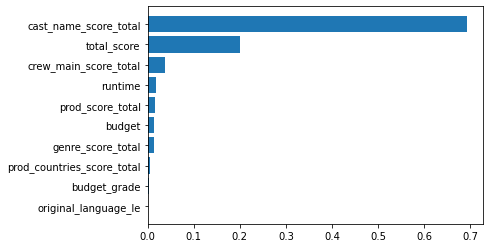

In [228]:
values = [v[0] for v in sorted(zip(rf.feature_importances_, X_train.columns), reverse=False)]
features = [v[1] for v in sorted(zip(rf.feature_importances_, X_train.columns), reverse=False)]

plt.barh(np.arange(10), values)
plt.yticks(np.arange(10), features)
plt.show()

> 현재 버전 모델의 피쳐 중요도를 확인해본 결과,<br/>
> 기본적으로 'profit'과의 상관관계가 높은 피쳐들의 중요도 역시 높게 확인되며<br/>
> 반면에 상관관계는 가장 낮은 수준이었던 "runtime"의 피쳐 중요도가 4번째에 위치하고 있다는 점이 특징임<br/>

### Train 데이터 예측 성능 시각화

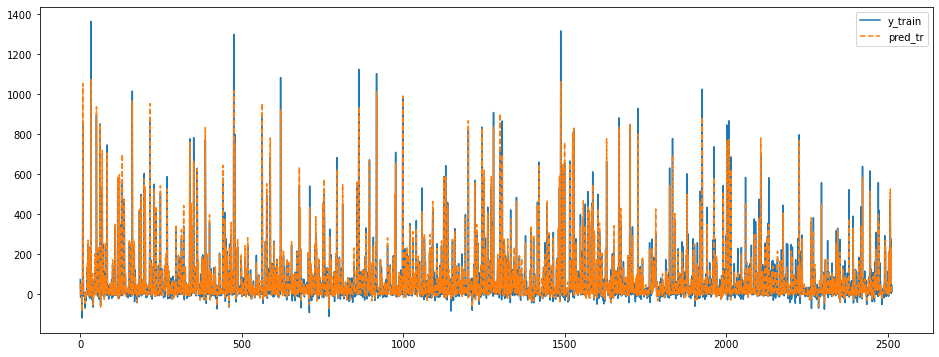

In [229]:
plt.figure(figsize=(16,6))
plt.plot(y_train.index, y_train, linestyle='-', label='y_train')
plt.plot(y_train.index, pred_tr, linestyle='--', label='pred_tr')
plt.legend()

> 데이터 건수가 많아 하나의 그래프로 세부적인 확인은 어렵지만, 전체적으로 학습한 데이터의 'profit'이 나타내는 경향을 비교적 잘 따르고 있는 것으로 확인됨

### Test 데이터 예측 성능 시각화

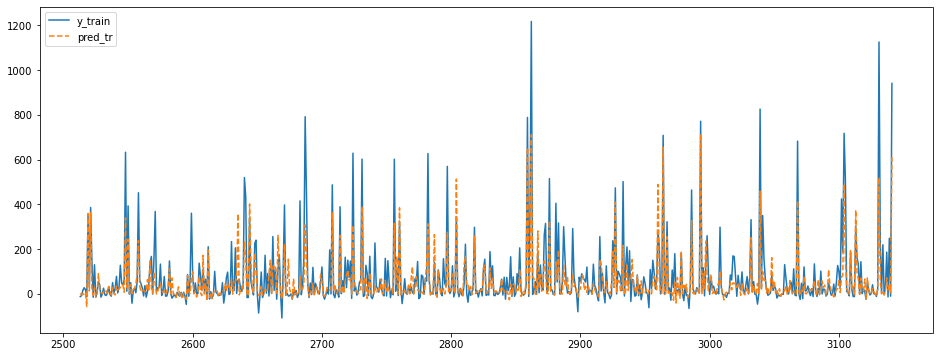

In [230]:
plt.figure(figsize=(16,6))
plt.plot(y_test.index, y_test, linestyle='-', label='y_train')
plt.plot(y_test.index, pred_test, linestyle='--', label='pred_tr')
plt.legend()

> Test 데이터에서도 전체적인 경향은 따르고 있는 것으로 확인되나, 'profit'이 매우 크거나 작은 아웃라이어에 대한 예측에는 한계가 있는 것으로 확인됨

> 아무래도 영화의 최종 순수익 금액은 현재 데이터에 포함된 특성지표들 외에도 수많은 변수가 반영되는 부분이라 예측에 대한 어느정도의 한계는 예상했으며, 그와 같은 부분이 그래프로 표현되었다고 판단됨

> => 이후에는 각기 다른 모델들을 적용해보고, 각 모델의 다양한 하이퍼파라미터값들을 설정해가며 성능을 높여가는 테스트를 진행해보고자 함

In [207]:
# 현재 버전 alldata csv파일 저장
train_ss.to_csv('./data/train_ss.csv')
test_ss.to_csv('./data/test_ss.csv')

In [4]:
# 파일 읽어오기
alldata8 = pd.read_csv('./data/alldata8.csv', index_col=0)
train_ss = pd.read_csv('./data/train_ss.csv', index_col=0)
test_ss = pd.read_csv('./data/test_ss.csv', index_col=0)

# 모델간 성능 비교 및 하이퍼파라미터 튜닝

### 모델간 성능 비교
* 지금까지는 RandomForest를 기반으로 피쳐엔지니어링을 통해 성능 향상 테스트를 진행함
* 현재 정리된 Feature들을 활용해 서로 다른 모델을 적용하여 최적의 모델을 선정하고자 함

### 하이퍼파라미터 튜닝
* 모델간 성능 비교와 함께 각 모델의 하이퍼파라미터값을 각각의 조합별로 테스트 진행
* GridSearchCV를 활용해 최적의 모델과 하이퍼파라미터값을 도출하고자 함

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [6]:
# 모델 list 생성

models = []

models.append(('LinearRegression', LinearRegression()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))

models

[('LinearRegression', LinearRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('RandomForestRegressor', RandomForestRegressor()),
 ('XGBRegressor',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)),
 ('LGBMRegressor', LGBMRegressor())]

In [7]:
# X, y 데이터 셋팅
X_train = train_ss.drop('profit', axis=1)
y_train = train_ss['profit']
X_test = test_ss.drop('profit', axis=1)
y_test = test_ss['profit']

### 모델간 성능 비교(1차)

In [8]:
df_list = []

for model_name, model in models:
    model.fit(X_train, y_train)
    
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    RMSE_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
    RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))
    
    df = pd.DataFrame([[model_name, RMSE_tr, RMSE_test]], columns=['model_name', 'RMSE_tr', 'RMSE_test'])
    df_list.append(df)

result_df = pd.concat(df_list)
result_df = result_df.set_index('model_name')
result_df

,RMSE_tr,RMSE_test
model_name,,
LinearRegression,58.16073,93.34362
AdaBoostRegressor,59.44021,90.18210
GradientBoostingRegressor,39.72312,92.03660
RandomForestRegressor,20.67592,89.56662
XGBRegressor,8.06507,93.19819
LGBMRegressor,30.67601,87.62055


> 6개 모델 중 Test 데이터에 대한 성능이 높게 나타난 RandomForest, LGBMRegressor 모델을 중심으로 하이퍼파라미터 튜닝을 진행하고자 함

### 모델간 성능 비교(2차) - 모델별 하이퍼파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

#### RandomForestRegressor

In [55]:
# X, y 데이터 셋팅
X_train = train_ss.drop('profit', axis=1)
y_train = train_ss['profit']
X_test = test_ss.drop('profit', axis=1)
y_test = test_ss['profit']

rf_reg = RandomForestRegressor()

params = {
    'max_depth' : [5, 30, 50],
    'n_estimators' : [100, 300, 500],
}

grid_cv = GridSearchCV(rf_reg, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 30, 50],
                         'n_estimators': [100, 300, 500]})

In [56]:
score_df = pd.DataFrame(grid_cv.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,"{'max_depth': 5, 'n_estimators': 100}",7,0.82880,0.11929
1,"{'max_depth': 5, 'n_estimators': 300}",8,0.82878,0.11731
2,"{'max_depth': 5, 'n_estimators': 500}",9,0.82816,0.11923
3,"{'max_depth': 30, 'n_estimators': 100}",3,0.83200,0.11486
4,"{'max_depth': 30, 'n_estimators': 300}",6,0.83096,0.11638
5,"{'max_depth': 30, 'n_estimators': 500}",1,0.83258,0.11610
6,"{'max_depth': 50, 'n_estimators': 100}",2,0.83249,0.11426
7,"{'max_depth': 50, 'n_estimators': 300}",4,0.83187,0.11692
8,"{'max_depth': 50, 'n_estimators': 500}",5,0.83178,0.11586


In [54]:
# 학습 및 성능 측정
rf_reg = RandomForestRegressor(max_depth=30, n_estimators=500)

rf_reg.fit(X_train, y_train)

pred_tr = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test, pred_test)))

Train Data RMSE : 20.432351922821326
Test Data RMSE : 89.28136937763585


####  LGBMRegressor

In [182]:
# X, y 데이터 셋팅
X_train = train_ss.drop('profit', axis=1)
y_train = train_ss['profit']
X_test = test_ss.drop('profit', axis=1)
y_test = test_ss['profit']

lgbm_reg = LGBMRegressor()

params = {
    'max_depth' : [5, 7, 9],
    'n_estimators' : [1000, 2000],
    'learning_rate' : [0.01, 0.1]
}

grid_cv = GridSearchCV(lgbm_reg, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)

score_df = pd.DataFrame(grid_cv.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",1,0.81625,0.10368
1,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",4,0.80971,0.10257
2,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",2,0.81316,0.10852
3,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",5,0.80889,0.10683
4,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",3,0.81182,0.10660
5,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",6,0.80357,0.10636
6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",8,0.78361,0.10062
7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",11,0.77548,0.10022
8,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",7,0.78519,0.10178
9,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",10,0.77722,0.10042


In [200]:
# 학습 및 성능 측정
lgbm_reg = LGBMRegressor(learning_rate=0.01, max_depth=6, n_estimators=1000)

lgbm_reg.fit(X_train, y_train)

pred_tr = lgbm_reg.predict(X_train)
pred_test = lgbm_reg.predict(X_test)

print('Train Data RMSE :', np.sqrt(mean_squared_error(y_train, pred_tr)))
print('Test Data RMSE :', np.sqrt(mean_squared_error(y_test, pred_test)))

Train Data RMSE : 38.83870147249006
Test Data RMSE : 86.88206443283795


> Train 데이터에 대한 RMSE는 다소 올라갔으나, 최종 평가 데이터인 Test 데이터에 대한 RMSE가 가장 낮게 확인됨

## 최적 모델 선정
* 6개 모델간 성능 테스트 및 하이퍼파라미터 튜닝 과정을 통해 최종적으로 LGBMRegressor가 Test데이터에 대해 가장 좋은 성능을 나타내는 것으로 확인됨